In [1]:
import utility
from tqdm import tqdm
import os
from sklearn.cluster import KMeans
import pyvista as pv
import pandas as pd
import numpy as np
from IPython.display import Image
from collections import defaultdict
from scipy import stats
import math
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from numpy.polynomial import polynomial as poly
from scipy.spatial import KDTree
from functools import partial
from multiprocessing import Pool
import sphere
import time

In [2]:
import importlib
importlib.reload(utility)

<module 'utility' from 'E:\\Data\\knorpel_v2\\utility.py'>

Disable shortcuts
<script>Jupyter.keyboard_manager.disable()</script>

In [3]:
# sitk_image, np_image = utility.read_image('/home/simon/Pictures/9001104/9001104_segm.mhd')
#sitk_image, np_image = utility.read_image('9102858_segm.mhd')
sitk_image, np_image = utility.read_image('C:/users/simon/downloads/mask.nii.gz')
femoral_cartilage = utility.build_3d_cartilage_array(np_image, 3)
tibial_cartilage = utility.build_3d_cartilage_array(np_image, 4)
femoral_vectors = [list(element) for element in femoral_cartilage]
tibial_vectors = [list(element) for element in tibial_cartilage]
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(femoral_vectors, tibial_vectors)
lpdf, rpdf, adf = utility.extract_anterior_posterior_zones(femoral_vectors, cwbzl, cwbzr)
ladf, radf = utility.split_anterior_part(adf)

c:\programdata\anaconda3\envs\knorpel_v2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\programdata\anaconda3\envs\knorpel_v2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


In [4]:
np.unique(np_image)

array([0, 1, 2, 3, 4], dtype=uint8)

In [5]:
i_1 = utility.build_3d_cartilage_array(np_image, 1)
i_2 = utility.build_3d_cartilage_array(np_image, 2)
i_3 = utility.build_3d_cartilage_array(np_image, 3)
i_4 = utility.build_3d_cartilage_array(np_image, 4)

p = pv.Plotter()
p.add_mesh(i_1, color='red')
p.add_mesh(i_2, color='green')
p.add_mesh(i_3, color='yellow')
p.add_mesh(i_4, color='blue')
p.enable_eye_dome_lighting()

p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

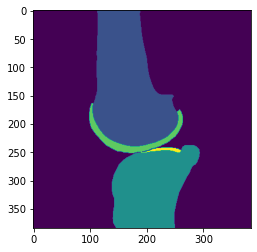

In [7]:
plt.imshow(np_image[100])

In [6]:
from pathlib import Path
for subdir in Path('../Failed_region_splitting').iterdir():
    print(subdir.name)

T1rho_P07_1Relaxed
T1rho_P07_2MedToLat
T1rho_P08_1Relaxed
T1rho_P08_2MedToLat
T1rho_P10_1Relaxed
T1rho_P12_2MedToLat
T1rho_P13_1Relaxed
T1rho_P15_2MedToLat
T1rho_P16_1Relaxed
T2_P04_1medialtolateral_1unloaded
T2_P04_2lateraltomedial_1unloaded
T2_P05_1medialtolateral_2loaded
T2_P06_1medialtolateral_1unloaded
T2_P06_1medialtolateral_2loaded
T2_P06_2lateraltomedial_1unloaded
T2_P06_2lateraltomedial_2loaded
T2_P10_1medialtolateral_1unloaded
T2_P10_1medialtolateral_2loaded
T2_P12_1medialtolateral_2loaded
T2_P13_1medialtolateral_1unloaded
T2_P13_2lateraltomedial_1unloaded
T2_P15_2lateraltomedial_1unloaded
T2_P15_2lateraltomedial_2loaded
T2_P16_1medialtolateral_1unloaded
T2_P16_1medialtolateral_2loaded
T2_P16_2lateraltomedial_2loaded


In [4]:
femoral_cartilage = utility.build_3d_cartilage_array(np_image, 3)
tibial_cartilage = utility.build_3d_cartilage_array(np_image, 4)

femoral_vectors = [list(element) for element in femoral_cartilage]
tibial_vectors = [list(element) for element in tibial_cartilage]

In [22]:
p = pv.Plotter()

x, y, z, xy = utility.get_xyz(tibial_vectors)
df = pd.DataFrame(data={'x': x, 'y': y, 'z': z}, columns=['x', 'y', 'z'])
p.add_mesh(pv.PolyData(df.to_numpy()), color='red')

x, y, z, xy = utility.get_xyz(femoral_vectors)
df = pd.DataFrame(data={'x': x, 'y': y, 'z': z}, columns=['x', 'y', 'z'])
p.add_mesh(pv.PolyData(df.to_numpy()), color='green')

tmp_vectors = utility.build_3d_cartilage_array(np_image, 1)
x, y, z, xy = utility.get_xyz(tmp_vectors)
df = pd.DataFrame(data={'x': x, 'y': y, 'z': z}, columns=['x', 'y', 'z'])
p.add_mesh(pv.PolyData(df.to_numpy()), color='blue')

tmp_vectors = utility.build_3d_cartilage_array(np_image, 2)
x, y, z, xy = utility.get_xyz(tmp_vectors)
df = pd.DataFrame(data={'x': x, 'y': y, 'z': z}, columns=['x', 'y', 'z'])
p.add_mesh(pv.PolyData(df.to_numpy()), color='yellow')

#p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

# Tibia

In [5]:
x, y, z, xy = utility.get_xyz(tibial_vectors)
df = pd.DataFrame(data={'x': z, 'y': y, 'z': x}, columns=['x', 'y', 'z'])

In [6]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(df.to_numpy()))
p.show_grid()
p.show()
p.render()
p.save_graphic('s1.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Approach:
Construct an upper and a lower mesh out of the cartilage volume and calculate the distance between the meshes (by raytracing, nearest neighbors, etc). To this end, group by x, y coordinates and for each pair (x, y), take the maximum z coordinate for the upper mesh and the minimum z coordinate for the lower mesh.

In [7]:
max_z = df.groupby(['x', 'y']).max()
min_z = df.groupby(['x', 'y']).min()

tmp1 = [np.array(item) for item in max_z.index]
tmp2 = [item for item in max_z.to_numpy()]
max_z = np.column_stack((tmp1, tmp2))

tmp1 = [np.array(item) for item in min_z.index]
tmp2 = [item for item in min_z.to_numpy()]
min_z = np.column_stack((tmp1, tmp2))

In [8]:
upper_cloud = pv.PolyData(max_z)
lower_cloud = pv.PolyData(min_z)

In [9]:
p = pv.Plotter()
p.add_mesh(upper_cloud, color='green')
p.add_mesh(lower_cloud, color='red')
p.add_mesh(pv.PolyData(df.to_numpy()), color='blue', opacity=0.25)
p.add_legend([['bone-sided mesh', 'green'], ['cartilage-sided mesh', 'red']])
p.show_grid()
p.show()
p.render()
p.save_graphic('tibial_points.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [10]:
# build polygon meshes for both point clouds using delaunay
lower_mesh = lower_cloud.delaunay_2d()
upper_mesh = upper_cloud.delaunay_2d()

We can now calculate the distance between the two meshes. In this example, we simply calculate the mean total distance using a k-d tree nearest neighbor search. For division into subregions, it is better to do raytracing from one mesh's normal vectors against the other mesh.

In [11]:
tree = KDTree(upper_cloud.points)
d, idx = tree.query(lower_cloud.points)
lower_cloud['distances'] = d
np.mean(d)

2.7352430942075143

In [12]:
importlib.reload(utility)

<module 'utility' from '/home/simon/knorpel_v2/utility.py'>

In [13]:
dd = defaultdict(list)
left_tibial_regions, right_tibial_regions, split_vector = utility.tibial_landmarks(lower_mesh.points)
for v in tqdm(lower_mesh.points):
    vector = np.array(v)
    # print(vector)
    label = utility.classify_tibial_point(vector[:2], left_tibial_regions, right_tibial_regions, split_vector)
    dd[label].append(vector)

dd.keys()

100%|█████████████████████████████████████| 8357/8357 [00:01<00:00, 6517.26it/s]


dict_keys(['aLT', 'iLT', 'aMT', 'eLT', 'iMT', 'eMT', 'cLT', 'cMT', 'pLT', 'pMT'])

In [14]:
left_tibial_regions

[[137, 31],
 [267, 31],
 [267, 74],
 [137, 74],
 17.0,
 array([203.42889544,  54.05171241])]

In [15]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(dd['eLT']), color='red')
p.add_mesh(pv.PolyData(dd['pLT']), color='blue')
p.add_mesh(pv.PolyData(dd['cLT']), color='green')
p.add_mesh(pv.PolyData(dd['aLT']), color='pink')
p.add_mesh(pv.PolyData(dd['iLT']), color='yellow')
p.add_mesh(pv.PolyData(dd['eMT']), color='red')
p.add_mesh(pv.PolyData(dd['pMT']), color='blue')
p.add_mesh(pv.PolyData(dd['cMT']), color='green')
p.add_mesh(pv.PolyData(dd['aMT']), color='pink')
p.add_mesh(pv.PolyData(dd['iMT']), color='yellow')
p.add_legend([['external', 'red'], ['posterior', 'blue'], ['anterior', 'pink'], ['internal', 'yellow'], ['central', 'green']])
p.add_title('Subregions of the tibial cartilage')
p.show_grid()
p.show()
p.render()
p.save_graphic('tibial_subregions.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

# Femur

In [19]:
x, y, z, xy = utility.get_xyz(femoral_vectors)
df = pd.DataFrame(data={'x': x, 'y': y, 'z': z}, columns=['x', 'y', 'z'])

In [20]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(df.to_numpy()))
p.show_grid()
p.show()
p.render()
p.save_graphic('s2.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Approach:
Using the same approach as for the tibial cartilage is not possible due to the volume's shape. Let's illustrate the problem: <br><br>
Instead of going by z coordinate, it makes more sense to take a central point and introduce a distance measure to that point.

In [37]:
center = np.array([df.x.min() + (df.x.max() - df.x.min()) / 2,
                   df.y.min() + (df.y.max() - df.y.min()) / 2,
                   df.z.min() + (df.z.max() - df.z.min()) / 2])

df['dist_to_cog'] = np.zeros(df.shape[0])
df['dist_to_cog'] = df.apply(lambda l: utility.vector_distance([l.x, l.y, l.z], center), axis=1)
df

,x,y,z,dist_to_cog
0,170,0,52,93.364876
1,171,0,52,94.180677
2,169,0,53,92.504054
3,170,0,53,93.316665
4,171,0,53,94.132885
...,...,...,...,...
122282,139,108,99,81.884064
122283,140,108,99,82.437855
122284,141,108,99,83.000000
122285,142,108,99,83.570330


If we now again group by x, y and take the min/max distance...

In [38]:
max_z = df[df.groupby(['x', 'y'])['dist_to_cog'].transform(max) == df['dist_to_cog']]
min_z = df[df.groupby(['x', 'y'])['dist_to_cog'].transform(min) == df['dist_to_cog']]

max_z = [item[:3] for item in max_z.to_numpy()]
min_z = [item[:3] for item in min_z.to_numpy()]

In [39]:
upper_cloud = pv.PolyData(max_z)
lower_cloud = pv.PolyData(min_z)

In [40]:
p = pv.Plotter()
p.add_mesh(upper_cloud, color='red')
p.add_mesh(lower_cloud, color='green')
p.add_mesh(pv.PolyData(df.to_numpy()[:,0:3]), color='blue', opacity=0.25)
p.add_legend([['bone-sided mesh', 'green'], ['cartilage-sided mesh', 'red']])
p.show_grid()
p.show()
p.render()
p.save_graphic('femoral_points.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

This is what we get. You can see that points are missing in the curved regions. This makes sense because we only take one value each for each (x, y) while for these regions, we'd need >= 2 values for the inner and outer mesh.<br><br>
Another way to approach this problem is again taking a central point, and from this point do raytracing against the cartilage volume. For each tracing vector, find the first and last intersection point with the volume (if any) and calculate the distance between the two.<br><br>
To this end, we can build a sphere and trace along the sphere's normal vectors.

In [41]:
num_sp = 30
sphere = pv.Sphere(center=center, radius=1, theta_resolution=num_sp, phi_resolution=num_sp)
sphere.compute_normals(point_normals=True, cell_normals=False, inplace=True)

PolyData (0x7f41a8b8fe20)
  N Cells:	1680
  N Points:	842
  X Bounds:	9.300e+01, 9.500e+01
  Y Bounds:	5.301e+01, 5.499e+01
  Z Bounds:	5.600e+01, 5.800e+01
  N Arrays:	1

In [42]:
p = pv.Plotter()
m = pv.PolyData(df.to_numpy()[:,0:3])
p.add_mesh(m, color='red')
p.add_mesh(sphere, color='green')
# p.add_mesh(sphere.glyph(scale='Normals', orient='Normals', tolerance=0.05), color='blue')
p.add_arrows(sphere.points, sphere['Normals'], 25)
p.show_grid()
p.add_title('Sphere placement for the femoral cartilage')
p.show()
p.render()
p.save_graphic('femoral_sphere.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Fixing the mesh approach
Another approach that might work is cutting the full volume into two shapes and rotating the problematic section. Let's have a look:

In [43]:
df = df.sort_values(by='x', ascending=True)
zrange = df.groupby(by=['x'])['z'].max() - df.groupby(by=['x'])['z'].min()
zrange.describe()

count    189.000000
mean      47.878307
std       30.161286
min       13.000000
25%       28.000000
50%       32.000000
75%       58.000000
max      112.000000
Name: z, dtype: float64

In [44]:
zmed = zrange.median()

In [46]:
zindex = zrange.loc[zrange < zmed].index.to_numpy()
mask = np.abs(stats.zscore(zindex)) < 2
lower_bound = zindex[mask].min()
upper_bound = zindex[mask].max()

In [47]:
#lower_bound = 35
#upper_bound = 122
print(lower_bound, upper_bound)

35 122


In [48]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(df.loc[df['x'] > lower_bound].loc[df['x'] < upper_bound].to_numpy()[:,0:3]), color='blue', opacity=0.25)
p.add_mesh(pv.PolyData(df.loc[df['x'] < lower_bound].to_numpy()[:,0:3]), color='red', opacity=0.25)
p.add_mesh(pv.PolyData(df.loc[df['x'] > upper_bound].to_numpy()[:,0:3]), color='yellow', opacity=0.25)
p.show()
p.render()
p.save_graphic('s3.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [49]:
right_portion = df.loc[df['x'] < lower_bound]
right_portion = right_portion[['z', 'y', 'x', 'dist_to_cog']]
right_portion.columns = ['x', 'y', 'z', 'dist_to_cog']

middle_portion = df.loc[df['x'] > lower_bound].loc[df['x'] < upper_bound]

left_portion = df.loc[df['x'] > upper_bound]
left_portion = left_portion[['z', 'y', 'x', 'dist_to_cog']]
left_portion.columns = ['x', 'y', 'z', 'dist_to_cog']

In [50]:
pv.plot(pv.PolyData(left_portion.to_numpy()[:,0:3]), color='yellow')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [51]:
pv.plot(pv.PolyData(right_portion.to_numpy()[:,0:3]), color='red')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [52]:
max_z = left_portion[left_portion.groupby(['x', 'y'])['dist_to_cog'].transform(max) == left_portion['dist_to_cog']]
min_z = left_portion[left_portion.groupby(['x', 'y'])['dist_to_cog'].transform(min) == left_portion['dist_to_cog']]

max_z = [item[:3] for item in max_z.to_numpy()]
min_z = [item[:3] for item in min_z.to_numpy()]

In [53]:
outer_cloud = pv.PolyData(max_z)
inner_cloud = pv.PolyData(min_z)

In [54]:
p = pv.Plotter()
p.add_mesh(inner_cloud, color='red', opacity=.5)
p.add_mesh(outer_cloud, color='blue', opacity=.5)
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [55]:
outer_delaunay = outer_cloud.delaunay_2d()
inner_delaunay = inner_cloud.delaunay_2d()

In [56]:
p = pv.Plotter()
p.add_mesh(inner_delaunay, color='red', opacity=.5)
p.add_mesh(outer_delaunay, color='blue', opacity=.5)
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

This seems to work all right. Let's do some raytracing.

In [57]:
def build_delaunay(portion):
    max_dist = portion[portion.groupby(['x', 'y'])['dist_to_cog'].transform(max) == portion['dist_to_cog']]
    min_dist = portion[portion.groupby(['x', 'y'])['dist_to_cog'].transform(min) == portion['dist_to_cog']]

    max_dist = [item[:3] for item in max_dist.to_numpy()]
    min_dist = [item[:3] for item in min_dist.to_numpy()]
    
    outer_cloud = pv.PolyData(max_dist)
    inner_cloud = pv.PolyData(min_dist)
    
    return outer_cloud.delaunay_2d(), inner_cloud.delaunay_2d()

In [58]:
left_outer, left_inner = build_delaunay(left_portion)
middle_outer, middle_inner = build_delaunay(middle_portion)
right_outer, right_inner = build_delaunay(right_portion)

In [59]:
left_out = left_outer.copy()
left_out.points = np.array([[x[2], x[1], x[0]] for x in left_out.points])
left_in = left_inner.copy()
left_in.points = np.array([[x[2], x[1], x[0]] for x in left_in.points])

middle_out = middle_outer.copy()
middle_out.points = np.array([[x[0], x[1], x[2]] for x in middle_out.points])
middle_in = middle_inner.copy()
middle_in.points = np.array([[x[0], x[1], x[2]] for x in middle_in.points])

right_out = right_outer.copy()
right_out.points = np.array([[x[2], x[1], x[0]] for x in right_out.points])
right_in = right_inner.copy()
right_in.points = np.array([[x[2], x[1], x[0]] for x in right_in.points])

In [60]:
p = pv.Plotter()
p.add_mesh(left_out, color='red')
p.add_mesh(middle_out, color='red')
p.add_mesh(right_out, color='red')
p.add_mesh(left_in, color='green')
p.add_mesh(middle_in, color='green')
p.add_mesh(right_in, color='green')
p.show_grid()
p.add_legend([['bone-sided mesh', 'green'], ['cartilage-sided mesh', 'red']])
p.add_title('Succesful construction of meshes for the femoral cartilage', font_size=10)

p.show()
p.render()
p.save_graphic('femoral_meshes.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [61]:
cluster = KMeans(n_clusters=1, random_state=0).fit(femoral_vectors)
split_vector = cluster.cluster_centers_[0]
femoral_split_vector = split_vector
left_plate, right_plate = utility.split_into_plates(femoral_vectors, split_vector)

first_split, second_split = utility.get_femoral_thirds(left_plate)
left_femoral_regions = [first_split, second_split]

first_split, second_split = utility.get_femoral_thirds(right_plate)
right_femoral_regions = [first_split, second_split]

In [62]:
def ray_trace(inner, outer):
    average_thickness = dict()
    n_points = inner.n_points
    average_thickness['ecLF'] = np.zeros(n_points)
    average_thickness['ccLF'] = np.zeros(n_points)
    average_thickness['icLF'] = np.zeros(n_points)
    average_thickness['icMF'] = np.zeros(n_points)
    average_thickness['ccMF'] = np.zeros(n_points)
    average_thickness['ecMF'] = np.zeros(n_points)
    
    inner_normals = inner.compute_normals(cell_normals=False)
    inner_normals['distances'] = np.zeros(inner.n_points)
    for i in range(inner_normals.n_points):
        v = inner.points[i]
        vec = inner_normals['Normals'][i] * inner_normals.length
        v0 = v - vec
        v1 = v + vec
        iv, ic = outer.ray_trace(v0, v1, first_point=True)
        dist = np.sqrt(np.sum((iv - v)**2))
        inner_normals['distances'][i] = dist
        label = utility.classify_femoral_point(v[:2], left_femoral_regions, right_femoral_regions, split_vector)
        average_thickness[label][i] = dist
    
    return average_thickness

In [63]:
left_thickness = ray_trace(left_inner, left_outer)
middle_thickness = ray_trace(middle_inner, middle_outer)
right_thickness = ray_trace(right_inner, right_outer)

In [64]:
average_thickness = {key: np.hstack((left_thickness[key], middle_thickness[key], right_thickness[key])) for key in left_thickness.keys()}

In [65]:
for key, value in average_thickness.items():
    mask = value == 0
    value[mask] = np.nan
    print(f'{key}: {np.nanmean(value)}')

ecLF: 4.129961834403946
ccLF: 5.005532149065432
icLF: 5.453199175673108
icMF: 6.514685954736944
ccMF: 4.35446237196326
ecMF: 3.9881449550694197


In [67]:
importlib.reload(utility)

<module 'utility' from '/home/simon/knorpel_v2/utility.py'>

In [68]:
df.to_numpy()[:,:3]

array([[  0.,  88.,  44.],
       [  0.,  90.,  48.],
       [  0.,  89.,  45.],
       ...,
       [188.,  18.,  54.],
       [188.,  23.,  53.],
       [188.,  13.,  38.]])

In [69]:
dd = defaultdict(list)
for vector in tqdm(df.to_numpy()[:,:3]):
    label = utility.classify_femoral_point(vector[:2], left_femoral_regions, right_femoral_regions, split_vector)
    dd[label].append(vector)

100%|███████████████████████████████| 122287/122287 [00:00<00:00, 307646.13it/s]


In [70]:
dd.keys()

dict_keys(['ccMF', 'ecMF', 'icMF', 'icLF', 'ccLF', 'ecLF'])

In [71]:
print(left_femoral_regions, right_femoral_regions, split_vector)

[22, 34] [77, 88] [ 75.94043521  55.95815581 110.1472356 ]


In [72]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(dd['ecLF']), color='red')
p.add_mesh(pv.PolyData(dd['icLF']), color='yellow')
p.add_mesh(pv.PolyData(dd['ccLF']), color='green')
p.add_mesh(pv.PolyData(dd['icMF']), color='pink')
p.add_mesh(pv.PolyData(dd['ecMF']), color='red')
p.add_mesh(pv.PolyData(dd['ccMF']), color='green')
p.show_grid()
p.add_legend([['external', 'red'], ['central', 'green'], ['internal (left)', 'yellow'], ['internal (right)', 'pink']])
p.add_title('Subregions of the femoral cartilage')
p.show()
p.render()
p.save_graphic('femoral_subregions.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Combine outer clouds for the regional classification

In [73]:
ldf = pd.DataFrame(data=left_outer.points, columns=['x', 'y', 'z'])
mdf = pd.DataFrame(data=middle_outer.points, columns=['x', 'y', 'z'])
rdf = pd.DataFrame(data=right_outer.points, columns=['x', 'y', 'z'])

ldf = ldf[['z', 'y', 'x']]
ldf.columns = ['x', 'y', 'z']

rdf = rdf[['z', 'y', 'x']]
rdf.columns = ['x', 'y', 'z']

cdf = pd.concat([ldf, mdf, rdf])

In [74]:
# outer_stack = np.vstack((left_outer.points, middle_outer.points, right_outer.points))
pv.PolyData(cdf.to_numpy()).plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Sphere approach for the tibial cartilage
Because why not?

In [80]:
x, y, z, xy = utility.get_xyz(tibial_vectors)
df = pd.DataFrame(data={'x': z, 'y': y, 'z': x}, columns=['x', 'y', 'z'])

In [81]:
center = np.array([df.x.min() + (df.x.max() - df.x.min()) / 2,
                   df.y.min() + (df.y.max() - df.y.min()) / 2,
                   df.z.max() * 1.25])
                   #df.z.min() + (df.z.max() - df.z.min()) / 2])

df['dist_to_cog'] = np.zeros(df.shape[0])
df['dist_to_cog'] = df.apply(lambda l: utility.vector_distance([l.x, l.y, l.z], center), axis=1)
df

,x,y,z,dist_to_cog
0,76,0,23,57.768936
1,77,0,23,57.976288
2,78,0,23,58.200086
3,79,0,23,58.440140
4,62,0,24,56.375970
...,...,...,...,...
35793,68,108,23,56.720807
35794,69,108,23,56.791285
35795,70,108,23,56.879258
35796,71,108,23,56.984647


In [82]:
num_sp = 30
sphere = pv.Sphere(center=center, radius=1, theta_resolution=num_sp, phi_resolution=num_sp)
sphere.compute_normals(point_normals=True, cell_normals=False, inplace=True)

PolyData (0x7fb82466ee20)
  N Cells:	1680
  N Points:	842
  X Bounds:	6.350e+01, 6.550e+01
  Y Bounds:	5.301e+01, 5.499e+01
  Z Bounds:	3.900e+01, 4.100e+01
  N Arrays:	1

In [86]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(df.to_numpy()[:,0:3]), color='red')
p.add_mesh(sphere, color='green')
# p.add_mesh(sphere.glyph(scale='Normals', orient='Normals', tolerance=0.05), color='blue')
p.add_arrows(sphere.points, sphere['Normals'], 5)
p.show_grid()
p.add_title('Sphere placement for the tibial cartilage')
p.show()
p.render()
p.save_graphic('tibial_sphere.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Extraction of the weight-bearing zone of the femoral cartilage

In [25]:
femoral_cartilage_new = [0] * (np_image.shape[0] * np_image.shape[1] * np_image.shape[2])
tibial_cartilage_new = [0] * (np_image.shape[0] * np_image.shape[1] * np_image.shape[2])
tindx = 0
findx = 0
for y in tqdm(range(np_image.shape[0])):
    for x in range(np_image.shape[1]):
        for z in range(np_image.shape[2]):
            if np_image[y,x,z] == 3:
                femoral_cartilage_new[findx] = [x, y, z]
                findx += 1
            if np_image[y,x,z] == 4:
                tibial_cartilage_new[tindx] = [x, y, z]
                tindx += 1

femoral_cartilage_new = np.array(femoral_cartilage_new, dtype=object)
femoral_cartilage_new = femoral_cartilage_new[femoral_cartilage_new != 0] 
femoral_cartilage_new = [list(element) for element in femoral_cartilage_new]

tibial_cartilage_new = np.array(tibial_cartilage_new, dtype=object)
tibial_cartilage_new = tibial_cartilage_new[tibial_cartilage_new != 0] 
tibial_cartilage_new = [list(element) for element in tibial_cartilage_new]

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [02:45<00:00,  1.04s/it]


In [26]:
x, y, z, xy = utility.get_xyz(tibial_cartilage_new)
df = pd.DataFrame(data={'x': z, 'y': y, 'z': x}, columns=['x', 'y', 'z'])
max_z = df.groupby(['x', 'y']).max()
min_z = df.groupby(['x', 'y']).min()

tmp1 = [np.array(item) for item in max_z.index]
tmp2 = [item for item in max_z.to_numpy()]
max_z = np.column_stack((tmp1, tmp2))

tmp1 = [np.array(item) for item in min_z.index]
tmp2 = [item for item in min_z.to_numpy()]
min_z = np.column_stack((tmp1, tmp2))

upper_cloud = pv.PolyData(max_z)

dd = defaultdict(list)
left_tibial_regions, right_tibial_regions, split_vector = utility.tibial_landmarks(max_z)
for v in tqdm(max_z):
    vector = np.array(v)
    # print(vector)
    label = utility.classify_tibial_point(vector[:2], left_tibial_regions, right_tibial_regions, split_vector)
    dd[label].append(vector)

dd.keys()

100%|███████████████████████████████████████████████████████████████████████████████████████| 11110/11110 [00:01<00:00, 7093.24it/s]


dict_keys(['aLT', 'iLT', 'aMT', 'eLT', 'eMT', 'iMT', 'cLT', 'cMT', 'pLT', 'pMT'])

In [27]:
wbl = np.vstack((np.array(dd['eLT']), np.array(dd['cLT']), np.array(dd['iLT'])))
wbr = np.vstack((np.array(dd['iMT']), np.array(dd['cMT']), np.array(dd['eMT'])))

In [28]:
tdfr = pd.DataFrame(data={'x': wbr[:,0], 'y': wbr[:,1], 'z': wbr[:,2]})
tdfl = pd.DataFrame(data={'x': wbl[:,0], 'y': wbl[:,1], 'z': wbl[:,2]})

In [29]:
print(max(np.array(dd['cMT'])[:,0]), max(np.array(dd['eMT'])[:,0]), max(np.array(dd['iMT'])[:,0]))

245 265 278


In [30]:
tdfr = tdfr.loc[tdfr['x'] < max(np.array(dd['cMT'])[:,0])].loc[tdfr['x'] > min(np.array(dd['cMT'])[:,0])]
tdfl = tdfl.loc[tdfl['x'] < max(np.array(dd['cLT'])[:,0])].loc[tdfl['x'] > min(np.array(dd['cLT'])[:,0])]

In [31]:
x, y, z, xy = utility.get_xyz(femoral_cartilage_new)
df = pd.DataFrame(data={'x': z, 'y': y, 'z': x}, columns=['x', 'y', 'z'])
fdfl = df.loc[df['y'] < df['y'].mean()]
fdfr = df.loc[df['y'] >= df['y'].mean()]

In [32]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(fdfl.to_numpy()), color='blue')
p.add_mesh(pv.PolyData(fdfr.to_numpy()), color='purple')
p.add_mesh(pv.PolyData(tdfl.to_numpy()), color='green')
p.add_mesh(pv.PolyData(tdfr.to_numpy()), color='yellow')
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [33]:
tree = KDTree(tdfl.to_numpy())
d, idx = tree.query(fdfl.to_numpy())
d

array([ 99.70456359, 100.24968828,  99.02524931, ...,  22.04540769,
        21.42428529,  20.83266666])

In [34]:
# wbz = np.array(femoral_cartilage_new)[np.where(d < 10)]
wbz = np.array(fdfl.to_numpy()[np.where(d < 10)])

In [35]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(fdfl.to_numpy()), color='blue')
p.add_mesh(pv.PolyData(tdfl.to_numpy()), color='green')
p.add_mesh(pv.PolyData(wbz), color='red')
#p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [36]:
minx = tdfl['x'].min()
maxx = tdfl['x'].max()
miny = tdfl['y'].min()
maxy = tdfl['y'].max()
wbz = fdfl.loc[fdfl['x'] > minx].loc[fdfl['x'] < maxx].loc[fdfl['y'] > miny].loc[fdfl['y'] < maxy].to_numpy()

In [37]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(fdfl.to_numpy()), color='blue')
p.add_mesh(pv.PolyData(tdfl.to_numpy()), color='green')
p.add_mesh(pv.PolyData(fdfr.to_numpy()), color='orange')
p.add_mesh(pv.PolyData(wbz), color='red')
#p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

# New approach for the femur

In [5]:
importlib.reload(utility)

<module 'utility' from '/home/simon/knorpel_v2/utility.py'>

In [6]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(femoral_vectors, tibial_vectors)

In [7]:
x, y, z, xy = utility.get_xyz(femoral_vectors)
df = pd.DataFrame(data={'x': z, 'y': y, 'z': x}, columns=['x', 'y', 'z'])
p = pv.Plotter()
p.add_mesh(pv.PolyData(df.to_numpy()))
p.add_mesh(pv.PolyData(cwbzl.to_numpy()), color='red')
p.add_mesh(pv.PolyData(cwbzr.to_numpy()), color='green')
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [9]:
lower_mesh_left, upper_mesh_left = utility.build_femoral_meshes(cwbzl)
lower_mesh_right, upper_mesh_right = utility.build_femoral_meshes(cwbzr)

In [10]:
p = pv.Plotter()
p.add_mesh(lower_mesh_left, color='red')
p.add_mesh(lower_mesh_right, color='blue')
p.add_mesh(upper_mesh_left, color='green')
p.add_mesh(upper_mesh_right, color='purple')
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [11]:
p = pv.Plotter()
p.add_mesh(lower_mesh_left, color='red')
p.add_mesh(lower_mesh_right, color='blue')
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [12]:
p = pv.Plotter()
p.add_mesh(upper_mesh_left, color='green')
p.add_mesh(upper_mesh_right, color='purple')
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [13]:
left_landmarks = utility.femoral_landmarks(upper_mesh_left.points)
right_landmarks = utility.femoral_landmarks(upper_mesh_right.points)

In [14]:
left_left_portion = cwbzl.loc[cwbzl['y'] < left_landmarks[0]]
left_middle_portion = cwbzl.loc[cwbzl['y'] >= left_landmarks[0]].loc[cwbzl['y'] < left_landmarks[1]]
left_right_portion = cwbzl.loc[cwbzl['y'] >= left_landmarks[1]]

In [15]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(left_left_portion.to_numpy()), color='blue')
p.add_mesh(pv.PolyData(left_middle_portion.to_numpy()), color='red')
p.add_mesh(pv.PolyData(left_right_portion.to_numpy()), color='green')
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [16]:
left_right_portion = left_right_portion[['z', 'y', 'x']]
left_right_portion.columns = ['x', 'y', 'z']

In [17]:
left_portion_lower_mesh, left_portion_upper_mesh = utility.build_tibial_meshes(left_left_portion.to_numpy())
middle_portion_lower_mesh, middle_portion_upper_mesh = utility.build_tibial_meshes(left_middle_portion.to_numpy())
right_portion_lower_mesh, right_portion_upper_mesh = utility.build_tibial_meshes(left_right_portion.to_numpy())

In [18]:
p = pv.Plotter()
p.add_mesh(left_portion_lower_mesh, color='blue')
p.add_mesh(middle_portion_lower_mesh, color='red')
p.add_mesh(right_portion_lower_mesh, color='green')
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [19]:
dd = defaultdict(list)
for vector in tqdm(cwbzl.to_numpy()[:,:3]):
    label = utility.classify_femoral_point(vector[:2], left_landmarks, True)
    dd[label].append(vector)

100%|█████████████████████████████████████████████████████████████████████████████████████| 10120/10120 [00:00<00:00, 441887.18it/s]


In [20]:
dd.keys()

dict_keys(['ecLF', 'ccLF', 'icLF'])

In [21]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(dd['ecLF']), color='red')
p.add_mesh(pv.PolyData(dd['icLF']), color='yellow')
p.add_mesh(pv.PolyData(dd['ccLF']), color='green')
p.show_grid()
p.add_legend([['external', 'red'], ['central', 'green'], ['internal (left)', 'yellow'], ['internal (right)', 'pink']])
p.add_title('Subregions of the femoral cartilage')
p.show()
# p.render()
# p.save_graphic('femoral_subregions.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [22]:
dd = defaultdict(list)
for vector in tqdm(cwbzr.to_numpy()[:,:3]):
    label = utility.classify_femoral_point(vector[:2], right_landmarks, False)
    dd[label].append(vector)

100%|█████████████████████████████████████████████████████████████████████████████████████| 11410/11410 [00:00<00:00, 417214.52it/s]


In [23]:
dd.keys()

dict_keys(['icMF', 'ccMF', 'ecMF'])

In [24]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(dd['icMF']), color='pink')
p.add_mesh(pv.PolyData(dd['ecMF']), color='red')
p.add_mesh(pv.PolyData(dd['ccMF']), color='green')
p.show_grid()
p.add_legend([['external', 'red'], ['central', 'green'], ['internal (left)', 'yellow'], ['internal (right)', 'pink']])
p.add_title('Subregions of the femoral cartilage')
p.show()
# p.render()
# p.save_graphic('femoral_subregions.svg')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [25]:
left_thickness = dict()
left_thickness['ecLF'] = np.zeros(lower_mesh_left.n_points)
left_thickness['ccLF'] = np.zeros(lower_mesh_left.n_points)
left_thickness['icLF'] = np.zeros(lower_mesh_left.n_points)

right_thickness = dict()
right_thickness['icMF'] = np.zeros(lower_mesh_right.n_points)
right_thickness['ccMF'] = np.zeros(lower_mesh_right.n_points)
right_thickness['ecMF'] = np.zeros(lower_mesh_right.n_points)

left_normals = lower_mesh_left.compute_normals(cell_normals=False)
right_normals = lower_mesh_right.compute_normals(cell_normals=False)

_, left_thickness = utility.calculate_femoral_thickness(left_normals, lower_mesh_left, upper_mesh_left, sitk_image, left_landmarks, left_thickness, True)
_, right_thickness = utility.calculate_femoral_thickness(right_normals, lower_mesh_right, upper_mesh_right, sitk_image, right_landmarks, right_thickness, False)

In [26]:
femoral_thickness = dict()
femoral_thickness.update(left_thickness)
femoral_thickness.update(right_thickness)

In [27]:
femoral_thickness

{'ecLF': array([18.14957944,  4.18986655,  3.04591173, ...,  0.        ,
         0.        ,  0.        ]),
 'ccLF': array([0., 0., 0., ..., 0., 0., 0.]),
 'icLF': array([0.      , 0.      , 0.      , ..., 4.199988, 2.799992, 0.699998]),
 'icMF': array([0.699998, 0.699998, 1.399996, ..., 0.      , 0.      , 0.      ]),
 'ccMF': array([0., 0., 0., ..., 0., 0., 0.]),
 'ecMF': array([0., 0., 0., ..., 0., 0., 0.])}

In [28]:
keys = set(femoral_thickness.keys())
for key in keys:
    value = femoral_thickness[key]
    mask = value == 0
    value[mask] = np.nan
    femoral_thickness[key + '.aSD'] = np.nanstd(value)
    femoral_thickness[key + '.aMav'] = np.nanmean(-np.sort(-value)[:math.ceil(len(value) * 0.01)])
    femoral_thickness[key + '.aMiv'] = np.nanmean(np.sort(value)[:math.ceil(len(value) * 0.01)])
    femoral_thickness[key] = np.nanmean(value)

In [29]:
femoral_thickness

{'ecLF': 3.8171511474057933,
 'ccLF': 5.515698179776914,
 'icLF': 3.9921458975019375,
 'icMF': 3.203264268879522,
 'ccMF': 5.989148381375881,
 'ecMF': 3.763880590630727,
 'icMF.aSD': 1.1406065762772055,
 'icMF.aMav': 5.116829016211624,
 'icMF.aMiv': 0.6999980000000002,
 'icLF.aSD': 1.3112522511015228,
 'icLF.aMav': 7.846349845604406,
 'icLF.aMiv': 1.1483024553966663,
 'ccLF.aSD': 0.6186535828990887,
 'ccLF.aMav': 6.5132478854586076,
 'ccLF.aMiv': 4.023842286645824,
 'ecLF.aSD': 2.1233391343485226,
 'ecLF.aMav': 12.394485600891374,
 'ecLF.aMiv': 1.6293572242965175,
 'ecMF.aSD': 1.594080513659783,
 'ecMF.aMav': 7.909195241629887,
 'ecMF.aMiv': 1.4350302038795786,
 'ccMF.aSD': 0.7224685980286254,
 'ccMF.aMav': 7.32548619929081,
 'ccMF.aMiv': 4.393036184290812}

In [30]:
importlib.reload(utility)

<module 'utility' from '/home/simon/knorpel_v2/utility.py'>

In [31]:
ladf, radf, pdf = utility.extract_anterior_posterior_zones(femoral_vectors, cwbzl, cwbzr)

In [32]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(ladf.to_numpy()), color='red')
p.add_mesh(pv.PolyData(radf.to_numpy()), color='green')
p.add_mesh(pv.PolyData(pdf.to_numpy()), color='blue')
# p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [33]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(ladf.to_numpy()), color='red')
p.add_mesh(pv.PolyData(radf.to_numpy()), color='green')
p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [34]:
la_lower_mesh, la_upper_mesh = utility.build_tibial_meshes(ladf.to_numpy())
ra_lower_mesh, ra_upper_mesh = utility.build_tibial_meshes(radf.to_numpy())
p_lower_mesh, p_upper_mesh = utility.build_tibial_meshes(pdf.to_numpy())

In [35]:
p = pv.Plotter()
p.add_mesh(la_lower_mesh, color='red')
p.add_mesh(la_upper_mesh, color='orange')
p.add_mesh(ra_lower_mesh, color='green')
p.add_mesh(ra_upper_mesh, color='cyan')
p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [36]:
p = pv.Plotter()
p.add_mesh(p_lower_mesh, color='red')
p.add_mesh(p_upper_mesh, color='green')
p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [37]:
la_normals = la_lower_mesh.compute_normals(cell_normals=False)
ra_normals = ra_lower_mesh.compute_normals(cell_normals=False)
p_normals = p_lower_mesh.compute_normals(cell_normals=False)

la_distances = utility.calculate_distance_without_classification(la_normals, la_lower_mesh, la_upper_mesh, sitk_image)
ra_distances = utility.calculate_distance_without_classification(ra_normals, ra_lower_mesh, ra_upper_mesh, sitk_image)
p_distances = utility.calculate_distance_without_classification(p_normals, p_lower_mesh, p_upper_mesh, sitk_image)

In [38]:
la_distances['distances']

array([0.        , 1.89497042, 3.5505721 , ..., 0.        , 0.        ,
       0.        ])

In [39]:
la_thickness = dict()
distances = la_distances['distances']
mask = distances == 0
distances[mask] = np.nan
la_thickness['aLF.aSD'] = np.nanstd(distances)
la_thickness['aLF.aMav'] = np.nanmean(-np.sort(-distances)[:math.ceil(len(distances) * 0.01)])
la_thickness['aLF.aMiv'] = np.nanmean(np.sort(distances)[:math.ceil(len(distances) * 0.01)])
la_thickness['aLF'] = np.nanmean(distances)

In [40]:
la_thickness

{'aLF.aSD': 2.8245065220366943,
 'aLF.aMav': 23.15468043175688,
 'aLF.aMiv': 1.3057824532524103,
 'aLF': 4.773370276932947}

In [41]:
ra_thickness = dict()
distances = ra_distances['distances']
mask = distances == 0
distances[mask] = np.nan
ra_thickness['aMF.aSD'] = np.nanstd(distances)
ra_thickness['aMF.aMav'] = np.nanmean(-np.sort(-distances)[:math.ceil(len(distances) * 0.01)])
ra_thickness['aMF.aMiv'] = np.nanmean(np.sort(distances)[:math.ceil(len(distances) * 0.01)])
ra_thickness['aMF'] = np.nanmean(distances)

In [42]:
ra_thickness

{'aMF.aSD': 1.9579087515350613,
 'aMF.aMav': 13.409865537279831,
 'aMF.aMiv': 0.9729198950689117,
 'aMF': 4.364521041284879}

In [43]:
p_thickness = dict()
distances = p_distances['distances']
mask = distances == 0
distances[mask] = np.nan
p_thickness['pF.aSD'] = np.nanstd(distances)
p_thickness['pF.aMav'] = np.nanmean(-np.sort(-distances)[:math.ceil(len(distances) * 0.01)])
p_thickness['pF.aMiv'] = np.nanmean(np.sort(distances)[:math.ceil(len(distances) * 0.01)])
p_thickness['pF'] = np.nanmean(distances)

In [44]:
p_thickness

{'pF.aSD': 5.104802586798915,
 'pF.aMav': 47.71493741287999,
 'pF.aMiv': 0.7433645494243941,
 'pF': 4.512998589901148}

# Changes to the femur for the sphere approach

In [121]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(femoral_vectors, tibial_vectors)
center_left = np.array([cwbzl.x.min() + (cwbzl.x.max() - cwbzl.x.min()) / 2,
                    cwbzl.y.min() + (cwbzl.y.max() - cwbzl.y.min()) / 2,
                    cwbzl.z.min() - (cwbzl.z.max() - cwbzl.z.min()) / 4])

center_right = np.array([cwbzr.x.min() + (cwbzr.x.max() - cwbzr.x.min()) / 2,
                    cwbzr.y.min() + (cwbzr.y.max() - cwbzr.y.min()) / 2,
                    cwbzr.z.min() - (cwbzr.z.max() - cwbzr.z.min()) / 4])

In [122]:
lower_mesh_left, upper_mesh_left = utility.build_femoral_meshes(cwbzl)
lower_mesh_right, upper_mesh_right = utility.build_femoral_meshes(cwbzr)

left_landmarks = utility.femoral_landmarks(upper_mesh_left.points)
right_landmarks = utility.femoral_landmarks(upper_mesh_right.points)

In [123]:
sphere_left = pv.Sphere(center=center_left, radius=1, theta_resolution=60, phi_resolution=60)
sphere_right = pv.Sphere(center=center_right, radius=1, theta_resolution=60, phi_resolution=60)

In [124]:
cwbzl['dist'] = np.zeros(cwbzl.shape[0])
cwbzl['dist'] = cwbzl.apply(lambda l: utility.vector_distance([l.x, l.y, l.z], center_left), axis=1)

cwbzr['dist'] = np.zeros(cwbzr.shape[0])
cwbzr['dist'] = cwbzr.apply(lambda l: utility.vector_distance([l.x, l.y, l.z], center_left), axis=1)

In [125]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(cwbzl.to_numpy()[:,:3]), color='red')
p.add_mesh(pv.PolyData(cwbzr.to_numpy()[:,:3]), color='green')
p.add_mesh(sphere_left, color='orange')
p.add_mesh(sphere_right, color='cyan')
#p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [126]:
sphere_left.compute_normals(point_normals=True, cell_normals=False, inplace=True)
sphere_right.compute_normals(point_normals=True, cell_normals=False, inplace=True)

PolyData (0x7f6f69487e20)
  N Cells:	6960
  N Points:	3482
  X Bounds:	2.260e+02, 2.280e+02
  Y Bounds:	1.115e+02, 1.135e+02
  Z Bounds:	1.762e+02, 1.782e+02
  N Arrays:	1

In [127]:
sphere_left_iter = np.array([[np.nan, np.nan]] * sphere_left.n_points, dtype='object')
sphere_right_iter = np.array([[np.nan, np.nan]] * sphere_right.n_points, dtype='object')

In [129]:
for i in range(sphere_left.n_points):
    sphere_left_iter[i,0] = tuple(sphere_left.points[i])
    sphere_left_iter[i,1] = tuple(sphere_left['Normals'][i])

In [130]:
for i in range(sphere_right.n_points):
    sphere_right_iter[i,0] = tuple(sphere_right.points[i])
    sphere_right_iter[i,1] = tuple(sphere_right['Normals'][i])

In [131]:
with Pool() as pool:
    res = pool.starmap(partial(sphere.vector_trace, df=cwbzl), iterable=sphere_left_iter)

In [132]:
res = np.array(res, dtype='object')
res = res[res != None]
res

array([list([array([213.,  42., 210.]), array([215.,  42., 220.])]),
       list([array([196.,  40., 211.]), array([195.,  38., 215.])]),
       list([array([197.,  40., 211.]), array([195.,  38., 216.])]), ...,
       list([array([210.,  40., 212.]), array([207.,  38., 221.])]),
       list([array([211.,  40., 212.]), array([208.,  38., 221.])]),
       list([array([211.,  40., 212.]), array([209.,  38., 221.])])],
      dtype=object)

In [133]:
inner_points = [item[0] for item in res]
outer_points = [item[1] for item in res]

In [134]:
left_thickness = dict()
left_thickness['ecLF'] = np.zeros(len(outer_points))
left_thickness['ccLF'] = np.zeros(len(outer_points))
left_thickness['icLF'] = np.zeros(len(outer_points))

In [135]:
for i in range(len(outer_points)):
    label = utility.classify_femoral_point(outer_points[i][:2], left_landmarks, True)
    left_thickness[label][i] = utility.vector_distance(inner_points[i], outer_points[i]) * sitk_image.GetSpacing()[1]

In [136]:
with Pool() as pool:
    res = pool.starmap(partial(sphere.vector_trace, df=cwbzr), iterable=sphere_right_iter)
    
res = np.array(res, dtype='object')
res = res[res != None]

inner_points = [item[0] for item in res]
outer_points = [item[1] for item in res]

right_thickness = dict()
right_thickness['icMF'] = np.zeros(len(outer_points))
right_thickness['ccMF'] = np.zeros(len(outer_points))
right_thickness['ecMF'] = np.zeros(len(outer_points))

for i in range(len(outer_points)):
    label = utility.classify_femoral_point(outer_points[i][:2], right_landmarks, False)
    right_thickness[label][i] = utility.vector_distance(inner_points[i], outer_points[i]) * sitk_image.GetSpacing()[1]

In [137]:
femoral_thickness = dict()
femoral_thickness.update(left_thickness)
femoral_thickness.update(right_thickness)

In [142]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(inner_points), color='red')
p.add_mesh(pv.PolyData(outer_points), color='green')
p.add_mesh(sphere_right, color='blue')
p.add_mesh(sphere_left, color='cyan')
# p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [141]:
len(inner_points), len(outer_points)

(1250, 1250)

In [144]:
lpdf, rpdf, adf = utility.extract_anterior_posterior_zones(femoral_vectors, cwbzl, cwbzr)

In [154]:
center_lp = np.array([lpdf.x.min() + (lpdf.x.max() - lpdf.x.min()) / 4,
                    lpdf.y.min() + (lpdf.y.max() - lpdf.y.min()) / 2,
                    lpdf.z.min() + (lpdf.z.max() - lpdf.z.min()) / 2])

center_rp = np.array([rpdf.x.min() + (rpdf.x.max() - rpdf.x.min()) / 4,
                    rpdf.y.min() + (rpdf.y.max() - rpdf.y.min()) / 2,
                    rpdf.z.min() + (rpdf.z.max() - rpdf.z.min()) / 2])

center_a = np.array([adf.x.min() + ((adf.x.max() - adf.x.min()) / 4) * 3,
                    adf.y.min() + (adf.y.max() - adf.y.min()) / 2,
                    adf.z.min() + (adf.z.max() - adf.z.min()) / 4])

In [155]:
sphere_lp = pv.Sphere(center=center_lp, radius=1, theta_resolution=60, phi_resolution=60)
sphere_rp = pv.Sphere(center=center_rp, radius=1, theta_resolution=60, phi_resolution=60)
sphere_a = pv.Sphere(center=center_a, radius=1, theta_resolution=60, phi_resolution=60)

In [156]:
lpdf['dist'] = np.zeros(lpdf.shape[0])
lpdf['dist'] = lpdf.apply(lambda l: utility.vector_distance([l.x, l.y, l.z], center_lp), axis=1)

rpdf['dist'] = np.zeros(rpdf.shape[0])
rpdf['dist'] = rpdf.apply(lambda l: utility.vector_distance([l.x, l.y, l.z], center_rp), axis=1)

adf['dist'] = np.zeros(adf.shape[0])
adf['dist'] = adf.apply(lambda l: utility.vector_distance([l.x, l.y, l.z], center_a), axis=1)

In [157]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(lpdf.to_numpy()[:,:3]), color='red')
p.add_mesh(pv.PolyData(rpdf.to_numpy()[:,:3]), color='green')
p.add_mesh(pv.PolyData(adf.to_numpy()[:,:3]), color='yellow')
p.add_mesh(sphere_lp, color='orange')
p.add_mesh(sphere_rp, color='cyan')
p.add_mesh(sphere_a, color='pink')
#p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [158]:
sphere_lp.compute_normals(point_normals=True, cell_normals=False, inplace=True)
sphere_rp.compute_normals(point_normals=True, cell_normals=False, inplace=True)
sphere_a.compute_normals(point_normals=True, cell_normals=False, inplace=True)

PolyData (0x7f6f621be3a0)
  N Cells:	6960
  N Points:	3482
  X Bounds:	1.783e+02, 1.802e+02
  Y Bounds:	7.700e+01, 7.900e+01
  Z Bounds:	1.275e+02, 1.295e+02
  N Arrays:	1

In [159]:
sphere_lp_iter = np.array([[np.nan, np.nan]] * sphere_lp.n_points, dtype='object')
sphere_rp_iter = np.array([[np.nan, np.nan]] * sphere_rp.n_points, dtype='object')
sphere_a_iter = np.array([[np.nan, np.nan]] * sphere_a.n_points, dtype='object')

In [160]:
for i in range(sphere_lp.n_points):
    sphere_lp_iter[i,0] = tuple(sphere_lp.points[i])
    sphere_lp_iter[i,1] = tuple(sphere_lp['Normals'][i])

for i in range(sphere_rp.n_points):
    sphere_rp_iter[i,0] = tuple(sphere_rp.points[i])
    sphere_rp_iter[i,1] = tuple(sphere_rp['Normals'][i])

for i in range(sphere_a.n_points):
    sphere_a_iter[i,0] = tuple(sphere_a.points[i])
    sphere_a_iter[i,1] = tuple(sphere_a['Normals'][i])

In [161]:
with Pool() as pool:
    res = pool.starmap(partial(sphere.vector_trace, df=lpdf), iterable=sphere_lp_iter)
    
res = np.array(res, dtype='object')
res = res[res != None]

inner_points = [item[0] for item in res]
outer_points = [item[1] for item in res]

femoral_thickness['pLF'] = np.zeros(len(outer_points))

for i in range(len(outer_points)):
    femoral_thickness['pLF'][i] = utility.vector_distance(inner_points[i], outer_points[i]) * sitk_image.GetSpacing()[1]

In [ ]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(inner_points), color='red')
p.add_mesh(pv.PolyData(outer_points), color='green')
p.add_mesh(sphere_lp, color='blue')
# p.show_grid()
p.show()

In [165]:
with Pool() as pool:
    res = pool.starmap(partial(sphere.vector_trace, df=rpdf), iterable=sphere_rp_iter)
    
res = np.array(res, dtype='object')
res = res[res != None]

inner_points = [item[0] for item in res]
outer_points = [item[1] for item in res]

femoral_thickness['pMF'] = np.zeros(len(outer_points))

for i in range(len(outer_points)):
    femoral_thickness['pMF'][i] = utility.vector_distance(inner_points[i], outer_points[i]) * sitk_image.GetSpacing()[1]

In [ ]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(inner_points), color='red')
p.add_mesh(pv.PolyData(outer_points), color='green')
p.add_mesh(sphere_rp, color='blue')
# p.show_grid()
p.show()

In [166]:
with Pool() as pool:
    res = pool.starmap(partial(sphere.vector_trace, df=adf), iterable=sphere_a_iter)
    
res = np.array(res, dtype='object')
res = res[res != None]

inner_points = [item[0] for item in res]
outer_points = [item[1] for item in res]

femoral_thickness['aF'] = np.zeros(len(outer_points))

for i in range(len(outer_points)):
    femoral_thickness['aF'][i] = utility.vector_distance(inner_points[i], outer_points[i]) * sitk_image.GetSpacing()[1]

In [167]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(inner_points), color='red')
p.add_mesh(pv.PolyData(outer_points), color='green')
p.add_mesh(sphere_a, color='blue')
# p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [ ]:
keys = set(femoral_thickness.keys())
for key in keys:
    value = femoral_thickness[key]
    mask = value == 0
    value[mask] = np.nan
    femoral_thickness[key + '.aSD'] = np.nanstd(value)
    femoral_thickness[key + '.aMav'] = np.nanmean(-np.sort(-value)[:math.ceil(len(value) * 0.01)])
    femoral_thickness[key + '.aMiv'] = np.nanmean(np.sort(value)[:math.ceil(len(value) * 0.01)])
    femoral_thickness[key] = np.nanmean(value)

In [170]:
femoral_thickness

{'ecLF': 4.254168576809634,
 'ccLF': 6.98313953815472,
 'icLF': 5.42020835149045,
 'icMF': 4.020005189361094,
 'ccMF': 6.806959055555063,
 'ecMF': 4.631621072368648,
 'icMF.aSD': 1.5098571893847004,
 'icMF.aMav': 6.959003755903373,
 'icMF.aMiv': 0.6999980000000001,
 'icLF.aSD': 1.6873368230091055,
 'icLF.aMav': 8.428010913231645,
 'icLF.aMiv': 1.9332429172746155,
 'ccLF.aSD': 0.8994741129404458,
 'ccLF.aMav': 8.251420462140674,
 'ccLF.aMiv': 2.966937508604229,
 'ecLF.aSD': 1.4068313959033591,
 'ecLF.aMav': 6.446578327200137,
 'ecLF.aMiv': 2.308594170076343,
 'ecMF.aSD': 1.8001236463621781,
 'ecMF.aMav': 7.357524924372445,
 'ecMF.aMiv': 1.4628052421806157,
 'ccMF.aSD': 1.5702833774469591,
 'ccMF.aMav': 8.54996391789425,
 'ccMF.aMiv': 1.2444025862480939,
 'pLF': 4.8483454651144,
 'pLF.aSD': 1.3076079153437061,
 'pLF.aMav': 7.768410268514307,
 'pLF.aMiv': 1.8195192284571164,
 'pMF': 5.464640870107453,
 'aF': 6.715075509931949,
 'pMF.aSD': 1.8053105780650751,
 'pMF.aMav': 9.657632026208681

In [169]:
key = 'aF'
value = femoral_thickness[key]
mask = value == 0
value[mask] = np.nan
femoral_thickness[key + '.aSD'] = np.nanstd(value)
femoral_thickness[key + '.aMav'] = np.nanmean(-np.sort(-value)[:math.ceil(len(value) * 0.01)])
femoral_thickness[key + '.aMiv'] = np.nanmean(np.sort(value)[:math.ceil(len(value) * 0.01)])
femoral_thickness[key] = np.nanmean(value)

# Changes to the femur for the function normals approach

In [7]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(femoral_vectors, tibial_vectors)

In [8]:
lpdf, rpdf, adf = utility.extract_anterior_posterior_zones(femoral_vectors, cwbzl, cwbzr)

In [9]:
cwbzl.nunique()['x']

35

In [10]:
sorted(cwbzl['x'].unique())

[195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229]

In [11]:
layers = np.zeros(cwbzl.nunique()['x'], dtype='object')

In [12]:
xs = sorted(cwbzl['x'].unique())
assert len(xs) == len(layers)

In [13]:
for i in range(len(layers)):
    layers[i] = cwbzl.loc[cwbzl['x'] == xs[i]][['y', 'z']].sort_values(by='y').to_numpy()

In [14]:
x = np.array([x[0] for x in layers[0]])
y = np.array([x[1] for x in layers[0]])

In [15]:
try:
    z = poly.polyfit(x, y, 3)
    der = poly.polyder(z)
except np.linalg.LinAlgError as e:
    print(e)

In [16]:
fun = poly.polyval(x, z)
new_x = np.arange(min(x), max(x))
normals = [poly.polyval(val, z) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]

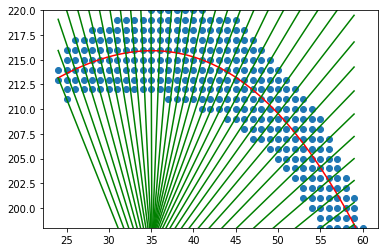

In [17]:
plt.scatter(x, y)
ax = plt.gca()
# ax.plot(x, fun(x), c='r')
ax.plot(x, fun, c='r')
# ax.plot(x, poly.polyval(40, z) - (1 / poly.polyval(40, der)) * (x - 40))
for normal in normals:
    ax.plot(new_x, normal, c='green')
plt.ylim((min(y), max(y)))
plt.show()

In [18]:
df = pd.DataFrame(layers[0], columns=['x', 'y'])

In [19]:
len(normals), len(normals[0]), len(new_x)

(36, 36, 36)

In [5]:
def trace(p, v, tolerance):
    point = None
    alpha = 1
    while True:
        g = p + alpha * v
        points = df.loc[abs(df['x'] - g[0]) <= tolerance].loc[abs(df['y'] - g[1]) <= tolerance]
        if points.shape[0] == 0:
            break
        
        point = points.iloc[0].to_numpy()
        alpha += 1
    
    return point

In [20]:
outline_points = np.zeros(len(normals), dtype=object)
# Idee: erster trace geht nicht nach [-1, slope]/[1, -slope], sondern nach [0, slope]/[0, -slope]

    
for i in range(len(normals)):
# for i in range(1):
    # i = 15
    x0 = new_x[i]
    normal = normals[i]
    intercept = normal[i]
    slope = -(normal[0] - normal[1])
    p = np.array([x0, intercept])
    v1 = np.array([-1, -slope]) * .1
    v2 = np.array([1, slope]) * .1
    point_1 = None
    point_2 = None
    for j in range(10):
        point_1 = trace(p, v1, j)
        if point_1 is not None:
            break

    for j in range(10):
        point_2 = trace(p, v2, j)
        if point_2 is not None:
            break
    
    if point_1 is None or point_2 is None:
        point_1 = None
        point_2 = None
    
    outline_points[i] = np.array([point_1, point_2])

outline_points

array([array([[ 24, 214],
              [ 25, 211]]), array([[ 25, 215],
                                   [ 26, 212]]), array([[ 25, 216],
                                                        [ 27, 212]]),
       array([[ 26, 217],
              [ 28, 212]]), array([[ 26, 217],
                                   [ 29, 212]]), array([[ 28, 218],
                                                        [ 30, 212]]),
       array([[ 29, 218],
              [ 30, 212]]), array([[ 31, 219],
                                   [ 31, 212]]), array([[ 31, 219],
                                                        [ 32, 212]]),
       array([[ 32, 219],
              [ 33, 212]]), array([[ 33, 219],
                                   [ 34, 212]]),
       array([None, None], dtype=object), array([[ 35, 212],
                                                 [ 36, 220]]),
       array([[ 37, 211],
              [ 37, 220]]), array([[ 37, 211],
                                   [ 38, 220]]),

In [21]:
indices = []
for i in range(len(outline_points)):
    if None in outline_points[i]:
        indices.append(i)

outline_points = np.delete(outline_points, indices)
outline_points

array([array([[ 24, 214],
              [ 25, 211]]), array([[ 25, 215],
                                   [ 26, 212]]), array([[ 25, 216],
                                                        [ 27, 212]]),
       array([[ 26, 217],
              [ 28, 212]]), array([[ 26, 217],
                                   [ 29, 212]]), array([[ 28, 218],
                                                        [ 30, 212]]),
       array([[ 29, 218],
              [ 30, 212]]), array([[ 31, 219],
                                   [ 31, 212]]), array([[ 31, 219],
                                                        [ 32, 212]]),
       array([[ 32, 219],
              [ 33, 212]]), array([[ 33, 219],
                                   [ 34, 212]]), array([[ 35, 212],
                                                        [ 36, 220]]),
       array([[ 37, 211],
              [ 37, 220]]), array([[ 37, 211],
                                   [ 38, 220]]), array([[ 37, 211],
               

In [22]:
new_x

array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59])

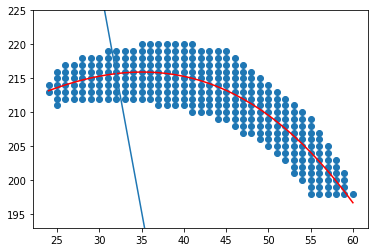

In [23]:
indx = 8
plt.scatter(x, y)
ax = plt.gca()
ax.plot(x, fun, c='r')
ax.plot(new_x, poly.polyval(new_x[indx], z) - (1 / poly.polyval(new_x[indx], der)) * (new_x - new_x[indx]))
#ax.scatter(point_1[0], point_1[1], color='red')
#ax.scatter(point_2[0], point_2[1], color='orange')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

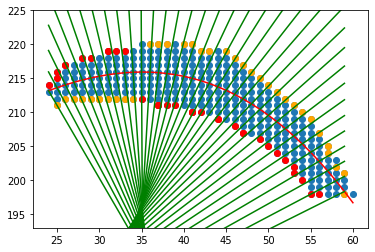

In [24]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(x, fun, c='r')
for i in range(len(normals)):
    ax.plot(new_x, normals[i], c='green')

for i in range(len(outline_points)):
    ax.scatter(outline_points[i][0][0], outline_points[i][0][1], color='red')
    ax.scatter(outline_points[i][1][0], outline_points[i][1][1], color='orange')
    
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [26]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(femoral_vectors, tibial_vectors)
lower_mesh_left, upper_mesh_left = utility.build_femoral_meshes(cwbzl)
lower_mesh_right, upper_mesh_right = utility.build_femoral_meshes(cwbzr)

left_landmarks = utility.femoral_landmarks(upper_mesh_left.points)
right_landmarks = utility.femoral_landmarks(upper_mesh_right.points)

In [27]:
outline_points[0]

array([[ 24, 214],
       [ 25, 211]])

In [33]:
left_thickness = dict()
left_thickness['ecLF'] = np.zeros(len(outline_points))
left_thickness['ccLF'] = np.zeros(len(outline_points))
left_thickness['icLF'] = np.zeros(len(outline_points))

for i, point in enumerate(outline_points):
    label = utility.classify_femoral_point(np.array([xs[0], point[0][0]]), left_landmarks, left=True)
    left_thickness[label][i] = utility.vector_distance(point[0], point[1])

In [34]:
keys = set(left_thickness.keys())
for key in keys:
    value = left_thickness[key]
    mask = value == 0
    value[mask] = np.nan
    left_thickness[key + '.aSD'] = np.nanstd(value)
    left_thickness[key + '.aMav'] = np.nanmean(-np.sort(-value)[:math.ceil(len(value) * 0.01)])
    left_thickness[key + '.aMiv'] = np.nanmean(np.sort(value)[:math.ceil(len(value) * 0.01)])
    left_thickness[key] = np.nanmean(value)

In [35]:
left_thickness

{'ecLF': 5.556226145168208,
 'ccLF': 8.744892037463282,
 'icLF': 5.735969652542662,
 'ecLF.aSD': 1.4242018900946751,
 'ecLF.aMav': 7.0710678118654755,
 'ecLF.aMiv': 3.1622776601683795,
 'ccLF.aSD': 0.7770368910382266,
 'ccLF.aMav': 9.848857801796104,
 'ccLF.aMiv': 7.0710678118654755,
 'icLF.aSD': 1.2309828641278016,
 'icLF.aMav': 7.211102550927978,
 'icLF.aMiv': 3.0}

## routines

In [50]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(femoral_vectors, tibial_vectors)
lower_mesh_left, upper_mesh_left = utility.build_femoral_meshes(cwbzl)
lower_mesh_right, upper_mesh_right = utility.build_femoral_meshes(cwbzr)

left_landmarks = utility.femoral_landmarks(upper_mesh_left.points)
right_landmarks = utility.femoral_landmarks(upper_mesh_right.points)

### routine for left side

In [ ]:
layers = np.zeros(cwbzl.nunique()['x'], dtype='object')
xs = sorted(cwbzl['x'].unique())
for i in range(len(layers)):
    layers[i] = cwbzl.loc[cwbzl['x'] == xs[i]][['y', 'z']].sort_values(by='y').to_numpy()

In [46]:
left_total_thickness = dict()
left_total_thickness['ecLF'] = np.zeros(1)
left_total_thickness['ccLF'] = np.zeros(1)
left_total_thickness['icLF'] = np.zeros(1)

for layer_index, layer in enumerate(layers):
    x = np.array([x[0] for x in layer])
    y = np.array([x[1] for x in layer])
    
    try:
        z = poly.polyfit(x, y, 3)
        der = poly.polyder(z)
    except np.linalg.LinAlgError as e:
        print(e)
        
    fun = poly.polyval(x, z)
    new_x = np.arange(min(x), max(x))
    normals = [poly.polyval(val, z) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]
    
    df = pd.DataFrame(layers[0], columns=['x', 'y'])
    outline_points = np.zeros(len(normals), dtype=object)
    
    for i in range(len(normals)):
        x0 = new_x[i]
        normal = normals[i]
        intercept = normal[i]
        slope = -(normal[0] - normal[1])
        p = np.array([x0, intercept])
        v1 = np.array([-1, -slope]) * .1
        v2 = np.array([1, slope]) * .1
        point_1 = None
        point_2 = None
        for j in range(10):
            point_1 = trace(p, v1, j)
            if point_1 is not None:
                break

        for j in range(10):
            point_2 = trace(p, v2, j)
            if point_2 is not None:
                break

        if point_1 is None or point_2 is None:
            point_1 = None
            point_2 = None

        outline_points[i] = np.array([point_1, point_2])
    
    indices = []
    for i in range(len(outline_points)):
        if None in outline_points[i]:
            indices.append(i)

    outline_points = np.delete(outline_points, indices)
    
    left_thickness = dict()
    left_thickness['ecLF'] = np.zeros(len(outline_points))
    left_thickness['ccLF'] = np.zeros(len(outline_points))
    left_thickness['icLF'] = np.zeros(len(outline_points))
    
    for i, point in enumerate(outline_points):
        label = utility.classify_femoral_point(np.array([xs[layer_index], point[0][0]]), left_landmarks, left=True)
        left_thickness[label][i] = utility.vector_distance(point[0], point[1])
    
    keys = set(left_thickness.keys())
    for key in keys:
        left_total_thickness[key] = np.hstack((left_total_thickness[key], left_thickness[key]))

In [47]:
keys = set(left_total_thickness.keys())
for key in keys:
    value = left_total_thickness[key]
    mask = value == 0
    value[mask] = np.nan
    left_total_thickness[key + '.aSD'] = np.nanstd(value)
    left_total_thickness[key + '.aMav'] = np.nanmean(-np.sort(-value)[:math.ceil(len(value) * 0.01)])
    left_total_thickness[key + '.aMiv'] = np.nanmean(np.sort(value)[:math.ceil(len(value) * 0.01)])
    left_total_thickness[key] = np.nanmean(value)

In [48]:
left_total_thickness

{'ecLF': 5.3090140918867865,
 'ccLF': 8.789141937410175,
 'icLF': 6.1522533574807605,
 'ecLF.aSD': 1.7241034300336047,
 'ecLF.aMav': 7.810056410862511,
 'ecLF.aMiv': 1.0,
 'ccLF.aSD': 0.8191361327994917,
 'ccLF.aMav': 10.138491982474216,
 'ccLF.aMiv': 6.906730453676086,
 'icLF.aSD': 0.8817685930243206,
 'icLF.aMav': 7.278547643417299,
 'icLF.aMiv': 4.149483635279306}

### routine for right side

In [49]:
layers = np.zeros(cwbzr.nunique()['x'], dtype='object')
xs = sorted(cwbzr['x'].unique())
for i in range(len(layers)):
    layers[i] = cwbzr.loc[cwbzr['x'] == xs[i]][['y', 'z']].sort_values(by='y').to_numpy()

In [52]:
right_total_thickness = dict()
right_total_thickness['ecMF'] = np.zeros(1)
right_total_thickness['ccMF'] = np.zeros(1)
right_total_thickness['icMF'] = np.zeros(1)

for layer_index, layer in enumerate(layers):
    x = np.array([x[0] for x in layer])
    y = np.array([x[1] for x in layer])
    
    try:
        z = poly.polyfit(x, y, 3)
        der = poly.polyder(z)
    except np.linalg.LinAlgError as e:
        print(e)
        
    fun = poly.polyval(x, z)
    new_x = np.arange(min(x), max(x))
    normals = [poly.polyval(val, z) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]
    
    df = pd.DataFrame(layers[0], columns=['x', 'y'])
    outline_points = np.zeros(len(normals), dtype=object)
    
    for i in range(len(normals)):
        x0 = new_x[i]
        normal = normals[i]
        intercept = normal[i]
        slope = -(normal[0] - normal[1])
        p = np.array([x0, intercept])
        v1 = np.array([-1, -slope]) * .1
        v2 = np.array([1, slope]) * .1
        point_1 = None
        point_2 = None
        for j in range(10):
            point_1 = trace(p, v1, j)
            if point_1 is not None:
                break

        for j in range(10):
            point_2 = trace(p, v2, j)
            if point_2 is not None:
                break

        if point_1 is None or point_2 is None:
            point_1 = None
            point_2 = None

        outline_points[i] = np.array([point_1, point_2])
    
    indices = []
    for i in range(len(outline_points)):
        if None in outline_points[i]:
            indices.append(i)

    outline_points = np.delete(outline_points, indices)
    
    right_thickness = dict()
    right_thickness['ecMF'] = np.zeros(len(outline_points))
    right_thickness['ccMF'] = np.zeros(len(outline_points))
    right_thickness['icMF'] = np.zeros(len(outline_points))
    
    for i, point in enumerate(outline_points):
        label = utility.classify_femoral_point(np.array([xs[layer_index], point[0][0]]), right_landmarks, left=False)
        right_thickness[label][i] = utility.vector_distance(point[0], point[1])
    
    keys = set(right_thickness.keys())
    for key in keys:
        right_total_thickness[key] = np.hstack((right_total_thickness[key], right_thickness[key]))

In [53]:
keys = set(right_total_thickness.keys())
for key in keys:
    value = right_total_thickness[key]
    mask = value == 0
    value[mask] = np.nan
    right_total_thickness[key + '.aSD'] = np.nanstd(value)
    right_total_thickness[key + '.aMav'] = np.nanmean(-np.sort(-value)[:math.ceil(len(value) * 0.01)])
    right_total_thickness[key + '.aMiv'] = np.nanmean(np.sort(value)[:math.ceil(len(value) * 0.01)])
    right_total_thickness[key] = np.nanmean(value)

In [54]:
right_total_thickness

{'ecMF': 5.060254533027946,
 'ccMF': 8.39031499900147,
 'icMF': 5.721005310752585,
 'ccMF.aSD': 0.877855575742938,
 'ccMF.aMav': 9.992780605274524,
 'ccMF.aMiv': 6.294542233491202,
 'icMF.aSD': 1.2148742487030955,
 'icMF.aMav': 7.211102550927977,
 'icMF.aMiv': 1.9839209526693566,
 'ecMF.aSD': 1.4009959236955325,
 'ecMF.aMav': 7.235315158405867,
 'ecMF.aMiv': 2.1754174373368373}

## posterior regions

In [6]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(femoral_vectors, tibial_vectors)
lpdf, rpdf, adf = utility.extract_anterior_posterior_zones(femoral_vectors, cwbzl, cwbzr)

### lateral (left) posterior

In [7]:
layers = np.zeros(lpdf.nunique()['y'], dtype='object')
ys = sorted(lpdf['y'].unique())
for i in range(len(layers)):
    layers[i] = lpdf.loc[lpdf['y'] == ys[i]][['x', 'z']].sort_values(by='z').to_numpy()

In [8]:
len(layers)

41

In [9]:
x = np.array([x[1] for x in layers[20]])
y = np.array([x[0] for x in layers[20]])

In [12]:
try:
    z = poly.polyfit(x, y, 2)
    der = poly.polyder(z)
except np.linalg.LinAlgError as e:
    print(e)
        
fun = poly.polyval(x, z)
new_x = np.arange(min(x), max(x))
normals = [poly.polyval(val, z) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]

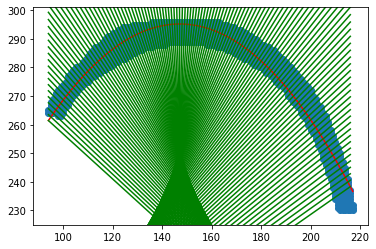

In [13]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(x, fun, c='r')
for normal in normals:
    ax.plot(new_x, normal, c='green')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [23]:
# df = pd.DataFrame(layers[20], columns=['x', 'y'])
df = pd.DataFrame({'x': x, 'y': y})

In [26]:
outline_points = np.zeros(len(normals), dtype=object)

for i in range(len(normals)):
    x0 = new_x[i]
    normal = normals[i]
    intercept = normal[i]
    slope = -(normal[0] - normal[1])
    p = np.array([x0, intercept])
    v1 = np.array([-1, -slope]) * .1
    v2 = np.array([1, slope]) * .1
    point_1 = None
    point_2 = None
    for j in range(10):
        point_1 = trace(p, v1, j)
        if point_1 is not None:
            break

    for j in range(10):
        point_2 = trace(p, v2, j)
        if point_2 is not None:
            break

    if point_1 is None or point_2 is None:
            point_1 = None
            point_2 = None

    outline_points[i] = np.array([point_1, point_2])

indices = []
for i in range(len(outline_points)):
    if None in outline_points[i]:
        indices.append(i)

outline_points = np.delete(outline_points, indices)

In [27]:
outline_points

array([array([[ 94, 264],
              [ 94, 264]]), array([[ 94, 264],
                                   [ 94, 264]]), array([[ 94, 265],
                                                        [ 98, 263]]),
       array([[ 95, 267],
              [ 99, 263]]), array([[ 95, 268],
                                   [100, 264]]), array([[ 97, 271],
                                                        [101, 266]]),
       array([[ 97, 271],
              [102, 267]]), array([[ 98, 272],
                                   [102, 268]]), array([[ 99, 273],
                                                        [103, 269]]),
       array([[100, 274],
              [104, 271]]), array([[101, 275],
                                   [105, 272]]), array([[102, 277],
                                                        [106, 272]]),
       array([[103, 278],
              [107, 273]]), array([[104, 279],
                                   [108, 274]]), array([[105, 280],
               

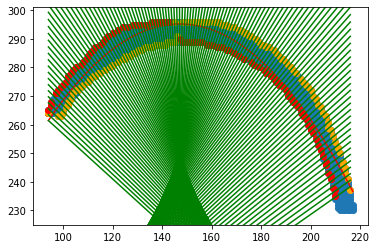

In [28]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(x, fun, c='r')
for i in range(len(normals)):
    ax.plot(new_x, normals[i], c='green')

for i in range(len(outline_points)):
    ax.scatter(outline_points[i][0][0], outline_points[i][0][1], color='red')
    ax.scatter(outline_points[i][1][0], outline_points[i][1][1], color='orange')
    
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [29]:
lp_thickness = np.zeros(len(outline_points))
for i, point in enumerate(outline_points):
    lp_thickness[i] = utility.vector_distance(point[0], point[1])

mask = lp_thickness == 0
lp_thickness[mask] = np.nan
print(np.nanstd(lp_thickness))
print(np.nanmean(-np.sort(-lp_thickness)[:math.ceil(len(lp_thickness) * 0.01)]))
print(np.nanmean(np.sort(lp_thickness)[:math.ceil(len(lp_thickness) * 0.01)]))
print(np.nanmean(lp_thickness))

1.13813174303144
10.295630140987
4.73606797749979
7.731730474835773


### medial (right) posterior

In [30]:
layers = np.zeros(rpdf.nunique()['y'], dtype='object')
ys = sorted(rpdf['y'].unique())
for i in range(len(layers)):
    layers[i] = rpdf.loc[rpdf['y'] == ys[i]][['x', 'z']].sort_values(by='z').to_numpy()

x = np.array([x[1] for x in layers[20]])
y = np.array([x[0] for x in layers[20]])

try:
    z = poly.polyfit(x, y, 2)
    der = poly.polyder(z)
except np.linalg.LinAlgError as e:
    print(e)
        
fun = poly.polyval(x, z)
new_x = np.arange(min(x), max(x))
normals = [poly.polyval(val, z) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]

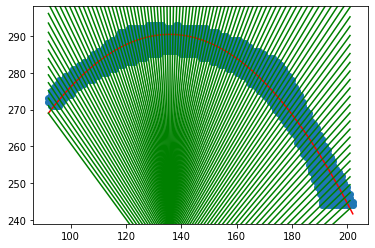

In [31]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(x, fun, c='r')
for normal in normals:
    ax.plot(new_x, normal, c='green')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [32]:
df = pd.DataFrame({'x': x, 'y': y})
outline_points = np.zeros(len(normals), dtype=object)

for i in range(len(normals)):
    x0 = new_x[i]
    normal = normals[i]
    intercept = normal[i]
    slope = -(normal[0] - normal[1])
    p = np.array([x0, intercept])
    v1 = np.array([-1, -slope]) * .1
    v2 = np.array([1, slope]) * .1
    point_1 = None
    point_2 = None
    for j in range(10):
        point_1 = trace(p, v1, j)
        if point_1 is not None:
            break

    for j in range(10):
        point_2 = trace(p, v2, j)
        if point_2 is not None:
            break

    if point_1 is None or point_2 is None:
            point_1 = None
            point_2 = None

    outline_points[i] = np.array([point_1, point_2])

indices = []
for i in range(len(outline_points)):
    if None in outline_points[i]:
        indices.append(i)

outline_points = np.delete(outline_points, indices)

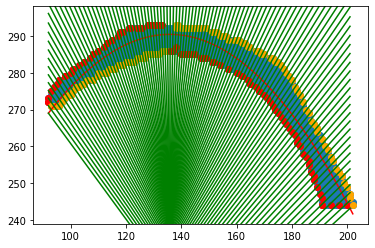

In [33]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(x, fun, c='r')
for i in range(len(normals)):
    ax.plot(new_x, normals[i], c='green')

for i in range(len(outline_points)):
    ax.scatter(outline_points[i][0][0], outline_points[i][0][1], color='red')
    ax.scatter(outline_points[i][1][0], outline_points[i][1][1], color='orange')
    
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [34]:
rp_thickness = np.zeros(len(outline_points))
for i, point in enumerate(outline_points):
    rp_thickness[i] = utility.vector_distance(point[0], point[1])

mask = rp_thickness == 0
rp_thickness[mask] = np.nan
print(np.nanstd(rp_thickness))
print(np.nanmean(-np.sort(-rp_thickness)[:math.ceil(len(rp_thickness) * 0.01)]))
print(np.nanmean(np.sort(rp_thickness)[:math.ceil(len(rp_thickness) * 0.01)]))
print(np.nanmean(rp_thickness))

1.7797935862796752
10.462887976860825
1.4142135623730951
7.5362880480068775


### single anterior

In [56]:
layers = np.zeros(adf.nunique()['y'], dtype='object')
ys = sorted(adf['y'].unique())
for i in range(len(layers)):
    layers[i] = adf.loc[adf['y'] == ys[i]][['x', 'z']].sort_values(by='z').to_numpy()

x = np.array([x[1] for x in layers[0]])
y = np.array([x[0] for x in layers[0]])

try:
    z = poly.polyfit(x, y, 2)
    der = poly.polyder(z)
except np.linalg.LinAlgError as e:
    print(e)
        
fun = poly.polyval(x, z)
new_x = np.arange(min(x), max(x))
normals = [poly.polyval(val, z) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]

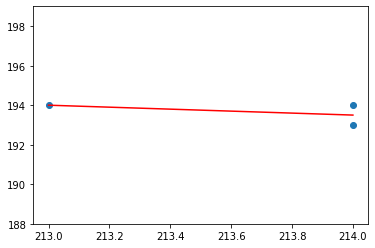

In [57]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(x, fun, c='r')
for normal in normals:
    ax.plot(new_x, normal, c='green')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [37]:
df = pd.DataFrame({'x': x, 'y': y})
outline_points = np.zeros(len(normals), dtype=object)

for i in range(len(normals)):
    x0 = new_x[i]
    normal = normals[i]
    intercept = normal[i]
    slope = -(normal[0] - normal[1])
    p = np.array([x0, intercept])
    v1 = np.array([-1, -slope]) * .1
    v2 = np.array([1, slope]) * .1
    point_1 = None
    point_2 = None
    for j in range(10):
        point_1 = trace(p, v1, j)
        if point_1 is not None:
            break

    for j in range(10):
        point_2 = trace(p, v2, j)
        if point_2 is not None:
            break

    if point_1 is None or point_2 is None:
            point_1 = None
            point_2 = None

    outline_points[i] = np.array([point_1, point_2])

indices = []
for i in range(len(outline_points)):
    if None in outline_points[i]:
        indices.append(i)

outline_points = np.delete(outline_points, indices)

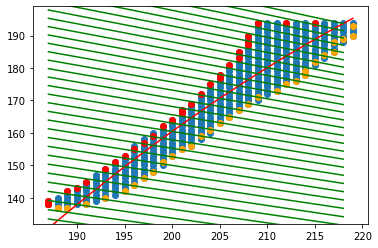

In [38]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(x, fun, c='r')
for i in range(len(normals)):
    ax.plot(new_x, normals[i], c='green')

for i in range(len(outline_points)):
    ax.scatter(outline_points[i][0][0], outline_points[i][0][1], color='red')
    ax.scatter(outline_points[i][1][0], outline_points[i][1][1], color='orange')
    
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [39]:
a_thickness = np.zeros(len(outline_points))
for i, point in enumerate(outline_points):
    a_thickness[i] = utility.vector_distance(point[0], point[1])

mask = a_thickness == 0
a_thickness[mask] = np.nan
print(np.nanstd(a_thickness))
print(np.nanmean(-np.sort(-a_thickness)[:math.ceil(len(rp_thickness) * 0.01)]))
print(np.nanmean(np.sort(a_thickness)[:math.ceil(len(rp_thickness) * 0.01)]))
print(np.nanmean(a_thickness))

2.383306225018752
10.295630140987
1.4142135623730951
5.9954025250842715


### routines

In [41]:
layers = np.zeros(lpdf.nunique()['y'], dtype='object')
ys = sorted(lpdf['y'].unique())
for i in range(len(layers)):
    layers[i] = lpdf.loc[lpdf['y'] == ys[i]][['x', 'z']].sort_values(by='z').to_numpy()

In [44]:
lp_total_thickness = dict()
lp_total_thickness['pLF'] = np.zeros(1)

for layer_index, layer in enumerate(tqdm(layers)):
    x = np.array([x[1] for x in layer]) # important to swap x and y here or we do not get a good fit
    y = np.array([x[0] for x in layer])
    
    try:
        z = poly.polyfit(x, y, 3)
        der = poly.polyder(z)
    except np.linalg.LinAlgError as e:
        print(e)
        
    fun = poly.polyval(x, z)
    new_x = np.arange(min(x), max(x))
    normals = [poly.polyval(val, z) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]
    
    df = pd.DataFrame({'x': x, 'y': y}) # also swap x and y for search space or we don't get hits!
    outline_points = np.zeros(len(normals), dtype=object)
    
    for i in range(len(normals)):
        x0 = new_x[i]
        normal = normals[i]
        intercept = normal[i]
        slope = -(normal[0] - normal[1])
        p = np.array([x0, intercept])
        v1 = np.array([-1, -slope]) * .1
        v2 = np.array([1, slope]) * .1
        point_1 = None
        point_2 = None
        for j in range(10):
            point_1 = trace(p, v1, j)
            if point_1 is not None:
                break

        for j in range(10):
            point_2 = trace(p, v2, j)
            if point_2 is not None:
                break

        if point_1 is None or point_2 is None:
            point_1 = None
            point_2 = None

        outline_points[i] = np.array([point_1, point_2])
    
    indices = []
    for i in range(len(outline_points)):
        if None in outline_points[i]:
            indices.append(i)

    outline_points = np.delete(outline_points, indices)
    
    lp_thickness = dict()
    lp_thickness['pLF'] = np.zeros(len(outline_points))
    
    for i, point in enumerate(outline_points):
        lp_thickness['pLF'][i] = utility.vector_distance(point[0], point[1])
    
    keys = set(lp_thickness.keys())
    for key in keys:
        lp_total_thickness[key] = np.hstack((lp_total_thickness[key], lp_thickness[key]))

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [02:20<00:00,  3.43s/it]


In [45]:
keys = set(lp_total_thickness.keys())
for key in keys:
    value = lp_total_thickness[key]
    mask = value == 0
    value[mask] = np.nan
    lp_total_thickness[key + '.aSD'] = np.nanstd(value)
    lp_total_thickness[key + '.aMav'] = np.nanmean(-np.sort(-value)[:math.ceil(len(value) * 0.01)])
    lp_total_thickness[key + '.aMiv'] = np.nanmean(np.sort(value)[:math.ceil(len(value) * 0.01)])
    lp_total_thickness[key] = np.nanmean(value)

In [46]:
lp_total_thickness

{'pLF': 7.010177930315136,
 'pLF.aSD': 1.6869183956584533,
 'pLF.aMav': 11.228158109950114,
 'pLF.aMiv': 2.0594584548042008}

In [47]:
layers = np.zeros(rpdf.nunique()['y'], dtype='object')
ys = sorted(rpdf['y'].unique())
for i in range(len(layers)):
    layers[i] = rpdf.loc[rpdf['y'] == ys[i]][['x', 'z']].sort_values(by='z').to_numpy()

In [48]:
rp_total_thickness = dict()
rp_total_thickness['pMF'] = np.zeros(1)

for layer_index, layer in enumerate(tqdm(layers)):
    x = np.array([x[1] for x in layer]) # important to swap x and y here or we do not get a good fit
    y = np.array([x[0] for x in layer])
    
    try:
        z = poly.polyfit(x, y, 3)
        der = poly.polyder(z)
    except np.linalg.LinAlgError as e:
        print(e)
        
    fun = poly.polyval(x, z)
    new_x = np.arange(min(x), max(x))
    normals = [poly.polyval(val, z) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]
    
    df = pd.DataFrame({'x': x, 'y': y}) # also swap x and y for search space or we don't get hits!
    outline_points = np.zeros(len(normals), dtype=object)
    
    for i in range(len(normals)):
        x0 = new_x[i]
        normal = normals[i]
        intercept = normal[i]
        slope = -(normal[0] - normal[1])
        p = np.array([x0, intercept])
        v1 = np.array([-1, -slope]) * .1
        v2 = np.array([1, slope]) * .1
        point_1 = None
        point_2 = None
        for j in range(10):
            point_1 = trace(p, v1, j)
            if point_1 is not None:
                break

        for j in range(10):
            point_2 = trace(p, v2, j)
            if point_2 is not None:
                break

        if point_1 is None or point_2 is None:
            point_1 = None
            point_2 = None

        outline_points[i] = np.array([point_1, point_2])
    
    indices = []
    for i in range(len(outline_points)):
        if None in outline_points[i]:
            indices.append(i)

    outline_points = np.delete(outline_points, indices)
    
    rp_thickness = dict()
    rp_thickness['pMF'] = np.zeros(len(outline_points))
    
    for i, point in enumerate(outline_points):
        rp_thickness['pMF'][i] = utility.vector_distance(point[0], point[1])
    
    keys = set(rp_thickness.keys())
    for key in keys:
        rp_total_thickness[key] = np.hstack((rp_total_thickness[key], rp_thickness[key]))

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [01:54<00:00,  2.61s/it]


In [50]:
keys = set(rp_total_thickness.keys())
for key in keys:
    value = rp_total_thickness[key]
    mask = value == 0
    value[mask] = np.nan
    rp_total_thickness[key + '.aSD'] = np.nanstd(value)
    rp_total_thickness[key + '.aMav'] = np.nanmean(-np.sort(-value)[:math.ceil(len(value) * 0.01)])
    rp_total_thickness[key + '.aMiv'] = np.nanmean(np.sort(value)[:math.ceil(len(value) * 0.01)])
    rp_total_thickness[key] = np.nanmean(value)

In [51]:
rp_total_thickness

{'pMF': 6.919120972935439,
 'pMF.aSD': 1.975388380802808,
 'pMF.aMav': 11.135450419330187,
 'pMF.aMiv': 2.1271451159344754}

In [61]:
layers = np.zeros(adf.nunique()['y'], dtype='object')
ys = sorted(adf['y'].unique())
for i in range(len(layers)):
    layers[i] = adf.loc[adf['y'] == ys[i]][['x', 'z']].sort_values(by='z').to_numpy()

In [62]:
a_total_thickness = dict()
a_total_thickness['aF'] = np.zeros(1)

for layer_index, layer in enumerate(tqdm(layers)):
    x = np.array([x[1] for x in layer]) # important to swap x and y here or we do not get a good fit
    y = np.array([x[0] for x in layer])
    
    try:
        z = poly.polyfit(x, y, 3)
        der = poly.polyder(z)
    except np.linalg.LinAlgError as e:
        print(e)
        
    fun = poly.polyval(x, z)
    new_x = np.arange(min(x), max(x))
    normals = [poly.polyval(val, z) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]
    
    df = pd.DataFrame({'x': x, 'y': y}) # also swap x and y for search space or we don't get hits!
    outline_points = np.zeros(len(normals), dtype=object)
    
    if len(normals) == 0:
        continue
    
    for i in range(len(normals)):
        x0 = new_x[i]
        normal = normals[i]
        
        if len(normal) < 2:
            outline_points[i] = np.array([None, None])
            continue
        
        intercept = normal[i]
        slope = -(normal[0] - normal[1])
        p = np.array([x0, intercept])
        v1 = np.array([-1, -slope]) * .1
        v2 = np.array([1, slope]) * .1
        point_1 = None
        point_2 = None
        for j in range(10):
            point_1 = trace(p, v1, j)
            if point_1 is not None:
                break

        for j in range(10):
            point_2 = trace(p, v2, j)
            if point_2 is not None:
                break

        if point_1 is None or point_2 is None:
            point_1 = None
            point_2 = None

        outline_points[i] = np.array([point_1, point_2])
    
    indices = []
    for i in range(len(outline_points)):
        if None in outline_points[i]:
            indices.append(i)

    outline_points = np.delete(outline_points, indices)
    
    a_thickness = dict()
    a_thickness['aF'] = np.zeros(len(outline_points))
    
    for i, point in enumerate(outline_points):
        a_thickness['aF'][i] = utility.vector_distance(point[0], point[1])
    
    keys = set(a_thickness.keys())
    for key in keys:
        a_total_thickness[key] = np.hstack((a_total_thickness[key], a_thickness[key]))

100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [04:03<00:00,  2.23s/it]


In [63]:
keys = set(a_total_thickness.keys())
for key in keys:
    value = a_total_thickness[key]
    mask = value == 0
    value[mask] = np.nan
    a_total_thickness[key + '.aSD'] = np.nanstd(value)
    a_total_thickness[key + '.aMav'] = np.nanmean(-np.sort(-value)[:math.ceil(len(value) * 0.01)])
    a_total_thickness[key + '.aMiv'] = np.nanmean(np.sort(value)[:math.ceil(len(value) * 0.01)])
    a_total_thickness[key] = np.nanmean(value)

In [64]:
a_total_thickness

{'aF': 6.59583667655505,
 'aF.aSD': 2.0289902680219467,
 'aF.aMav': 13.374628955409179,
 'aF.aMiv': 1.9285166263841078}

# revisiting function fitting for the tibia

In [7]:
lower_mesh, upper_mesh = utility.build_tibial_meshes(tibial_vectors)
left_tibial_landmarks, right_tibial_landmarks, split_vector = utility.tibial_landmarks(lower_mesh.points)

In [8]:
x, y, z, xy = utility.get_xyz(tibial_vectors)

In [9]:
left_plate, right_plate = utility.split_into_plates(tibial_vectors, [0, np.mean(y)])

In [11]:
x, y, z, xy = utility.get_xyz(left_plate)
ldf = pd.DataFrame(data={'x': z, 'y': y, 'z': x}, columns=['x', 'y', 'z'])

x, y, z, xy = utility.get_xyz(right_plate)
rdf = pd.DataFrame(data={'x': z, 'y': y, 'z': x}, columns=['x', 'y', 'z'])

In [42]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(ldf.to_numpy()), color='green')
p.add_mesh(pv.PolyData(rdf.to_numpy()), color='red')
p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [ ]:
layers = np.zeros(adf.nunique()['y'], dtype='object')
ys = sorted(adf['y'].unique())
for i in range(len(layers)):
    layers[i] = adf.loc[adf['y'] == ys[i]][['x', 'z']].sort_values(by='z').to_numpy()

In [13]:
layers = np.zeros(ldf.nunique()['x'], dtype='object')
xs = sorted(ldf['x'].unique())
for i in range(len(layers)):
    layers[i] = ldf.loc[ldf['x'] == xs[i]][['y', 'z']].sort_values(by='y').to_numpy()

In [48]:
len(layers), len(xs)

(147, 147)

In [64]:
layer = layers[70]
x = np.array([x[0] for x in layer])
y = np.array([x[1] for x in layer])
try:
    z = poly.polyfit(x, y, 4)
    der = poly.polyder(z)
except np.linalg.LinAlgError as e:
    print(e)

fun = poly.polyval(x, z)
new_x = np.arange(min(x), max(x))
normals = [poly.polyval(val, z) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]

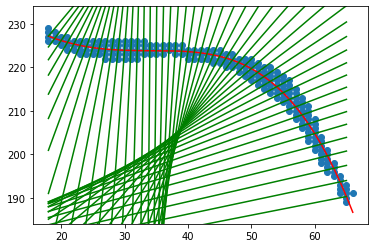

In [65]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(x, fun, c='r')
for normal in normals:
    ax.plot(new_x, normal, c='green')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [66]:
outline_points = np.zeros(len(normals), dtype=object)
df = pd.DataFrame(layers[70], columns=['x', 'y'])
    
for i in range(len(normals)):
    x0 = new_x[i]
    normal = normals[i]
    intercept = normal[i]
    slope = -(normal[0] - normal[1])
    p = np.array([x0, intercept])
    v1 = np.array([-1, -slope]) * .1
    v2 = np.array([1, slope]) * .1
    print(p, v1, v2)
    point_1 = None
    point_2 = None
    for j in range(10):
        point_1 = trace(p, v1, j)
        if point_1 is not None:
            break

    for j in range(10):
        point_2 = trace(p, v2, j)
        if point_2 is not None:
            break

    if point_1 is None or point_2 is None:
        point_1 = None
        point_2 = None

    outline_points[i] = np.array([point_1, point_2])

indices = []
for i in range(len(outline_points)):
    if None in outline_points[i]:
        indices.append(i)

outline_points = np.delete(outline_points, indices)

[ 18.         227.16399655] [-0.1        -0.17455057] [0.1        0.17455057]
[ 19.         226.62137829] [-0.1        -0.19503838] [0.1        0.19503838]
[ 20.         226.13775895] [-0.1        -0.21981187] [0.1        0.21981187]
[ 21.         225.71064597] [-0.1      -0.250163] [0.1      0.250163]
[ 22.         225.33735194] [-0.1        -0.28791141] [0.1        0.28791141]
[ 23.         225.01499464] [-0.1        -0.33568494] [0.1        0.33568494]
[ 24.         224.74049703] [-0.1        -0.39738969] [0.1        0.39738969]
[ 25.         224.51058723] [-0.1        -0.47902997] [0.1        0.47902997]
[ 26.         224.32179858] [-0.1        -0.59020605] [0.1        0.59020605]
[ 27.         224.17046955] [-0.1        -0.74700219] [0.1        0.74700219]
[ 28.         224.05274383] [-0.1        -0.97791651] [0.1        0.97791651]
[ 29.         223.96457027] [-0.1        -1.33695955] [0.1        1.33695955]
[ 30.         223.90170288] [-0.1        -1.93504744] [0.1        1.9350

In [68]:
outline_points

array([array([[ 18, 226],
              [ 18, 228]]), array([[ 18, 226],
                                   [ 19, 228]]), array([[ 20, 225],
                                                        [ 20, 227]]),
       array([[ 21, 224],
              [ 21, 227]]), array([[ 21, 224],
                                   [ 22, 226]]), array([[ 23, 223],
                                                        [ 23, 226]]),
       array([[ 23, 223],
              [ 24, 226]]), array([[ 24, 223],
                                   [ 25, 226]]), array([[ 25, 223],
                                                        [ 26, 226]]),
       array([[ 27, 222],
              [ 27, 226]]), array([[ 27, 222],
                                   [ 28, 226]]), array([[ 28, 222],
                                                        [ 29, 226]]),
       array([[ 29, 222],
              [ 30, 225]]), array([[ 29, 222],
                                   [ 31, 226]]), array([[ 28, 222],
               

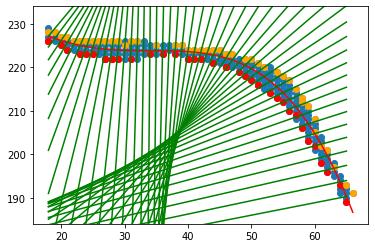

In [69]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(x, fun, c='r')
for i in range(len(normals)):
    ax.plot(new_x, normals[i], c='green')

for i in range(len(outline_points)):
    ax.scatter(outline_points[i][0][0], outline_points[i][0][1], color='red')
    ax.scatter(outline_points[i][1][0], outline_points[i][1][1], color='orange')
    
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [43]:
lower_mesh, upper_mesh = utility.build_tibial_meshes(tibial_vectors)
left_landmarks, right_landmarks, split_vector = utility.tibial_landmarks(lower_mesh.points)

In [70]:
layer_index = 70
for i, point in enumerate(outline_points):
    print(utility.classify_tibial_point(np.array([xs[layer_index], point[0][0]]), left_landmarks, right_landmarks, split_vector))

eLT
eLT
eLT
eLT
eLT
eLT
eLT
eLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
cLT
iLT
iLT


# Revisiting the function value approach

In [5]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(
        femoral_vectors, tibial_vectors)
lpdf, rpdf, adf = utility.extract_anterior_posterior_zones(
    femoral_vectors, cwbzl, cwbzr)

lower_mesh_left, upper_mesh_left = utility.build_femoral_meshes(cwbzl)
lower_mesh_right, upper_mesh_right = utility.build_femoral_meshes(cwbzr)

left_landmarks = utility.femoral_landmarks(upper_mesh_left.points)
right_landmarks = utility.femoral_landmarks(upper_mesh_right.points)

In [6]:
import function_normals

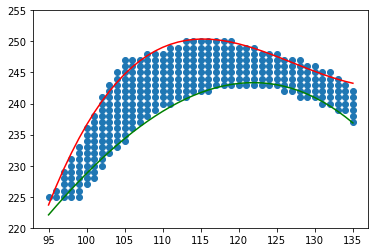

In [7]:
xs, layers = function_normals.build_cwbz_layers(cwbzr)
layer_index = 15
layer = layers[layer_index]
x = np.array([x[0] for x in layer])
y = np.array([x[1] for x in layer])
df = pd.DataFrame(layer, columns=['x', 'y'])
upper_points = df.groupby(by='x').max().reset_index()
lower_points = df.groupby(by='x').min().reset_index()
try:
    upper_fit = poly.polyfit(upper_points['x'], upper_points['y'], 3)
    lower_fit = poly.polyfit(lower_points['x'], lower_points['y'], 3)
except np.linalg.LinAlgError as e:
    print(e)
    
upper_fun = poly.polyval(upper_points['x'], upper_fit)
lower_fun = poly.polyval(lower_points['x'], lower_fit)
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [23]:
thickness = 0
for val in x:
    thickness += poly.polyval(val, upper_fit) - poly.polyval(val, lower_fit)

print(thickness / len(x))

7.660359091746586


In [14]:
ladf, radf = utility.split_anterior_part(adf)
xs, layers = function_normals.build_peripheral_layers(ladf)

In [15]:
len(layers)

54

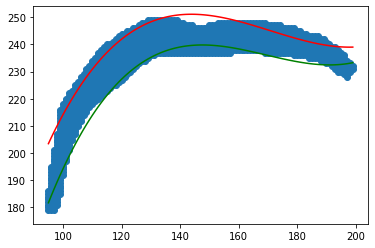

In [31]:
layer_index = 40
layer = layers[layer_index]
x = np.array([x[0] for x in layer])
y = np.array([x[1] for x in layer])
df = pd.DataFrame({'x': x, 'y': y})
upper_points = df.groupby(by='x').max().reset_index()
lower_points = df.groupby(by='x').min().reset_index()
try:
    upper_fit = poly.polyfit(upper_points['x'], upper_points['y'], 3)
    lower_fit = poly.polyfit(lower_points['x'], lower_points['y'], 3)
except np.linalg.LinAlgError as e:
    print(e)
    
upper_fun = poly.polyval(upper_points['x'], upper_fit)
lower_fun = poly.polyval(lower_points['x'], lower_fit)
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [22]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(ladf.to_numpy()), color='red')
p.add_mesh(pv.PolyData(radf.to_numpy()), color='green')
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [32]:
thickness = 0
for val in x:
    thickness += (poly.polyval(val, upper_fit) - poly.polyval(val, lower_fit)) * sitk_image.GetSpacing()[1]

print(thickness / len(x))

4.842334418591787


# Subdividing the anterior femoral zone

In [5]:
importlib.reload(utility)

<module 'utility' from 'E:\\Data\\knorpel_v2\\utility.py'>

In [6]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(
        femoral_vectors, tibial_vectors)
lpdf, rpdf, ladf, radf = utility.extract_anterior_posterior_zones(
    femoral_vectors, cwbzl, cwbzr)

In [7]:
p = pv.Plotter()
p.add_mesh(pv.PolyData(ladf.to_numpy()), color='green')
p.add_mesh(pv.PolyData(radf.to_numpy()), color='red')
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

# Screenshots

In [16]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(femoral_vectors, tibial_vectors)
lower_mesh_left, upper_mesh_left = utility.build_femoral_meshes(cwbzl)
lower_mesh_right, upper_mesh_right = utility.build_femoral_meshes(cwbzr)
lpdf, rpdf, adf = utility.extract_anterior_posterior_zones(femoral_vectors, cwbzl, cwbzr)
ladf, radf = utility.split_anterior_part(adf)

In [9]:
lp_lower_mesh, lp_upper_mesh = utility.build_tibial_meshes(lpdf.to_numpy()) # left (lateral) posterior region
rp_lower_mesh, rp_upper_mesh = utility.build_tibial_meshes(rpdf.to_numpy()) # right (medial) posterior region
la_lower_mesh, la_upper_mesh = utility.build_tibial_meshes(ladf.to_numpy()) # anterior region
ra_lower_mesh, ra_upper_mesh = utility.build_tibial_meshes(radf.to_numpy())

In [20]:
p = pv.Plotter()
p.set_background('w')
p.add_mesh(pv.PolyData(adf.to_numpy()), color='lightgrey')
p.show_grid(color='black')
p.camera_position = 'yz'
p.camera.azimuth = 90
p.camera.elevation = 180
#p.screenshot('screenshots/posterior_femur_yz.png')
#p.close()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [20]:
sum(lower_mesh_left.compute_cell_sizes()['Area'])

1217.4282981906108

In [19]:
lower_mesh_left.area

1217.428298190611

In [25]:
lower_mesh_left.compute_cell_sizes()['Area'].mean(), lower_mesh_left.compute_cell_sizes()['Area'].std()

(0.6357327927888309, 0.18071645631440214)

In [26]:
lower_mesh_right.compute_cell_sizes()['Area'].mean(), lower_mesh_right.compute_cell_sizes()['Area'].std()

(0.6851404386094668, 0.2714586531842227)

In [27]:
upper_mesh_left.compute_cell_sizes()['Area'].mean(), upper_mesh_left.compute_cell_sizes()['Area'].std()

(0.7244914692572024, 0.262758426349576)

In [28]:
upper_mesh_right.compute_cell_sizes()['Area'].mean(), upper_mesh_right.compute_cell_sizes()['Area'].std()

(0.7521041707671197, 0.31424480371845176)

In [29]:
lp_lower_mesh.compute_cell_sizes()['Area'].mean(), lp_lower_mesh.compute_cell_sizes()['Area'].std()

(0.7826475156984053, 0.460354482990552)

In [30]:
rp_lower_mesh.compute_cell_sizes()['Area'].mean(), rp_lower_mesh.compute_cell_sizes()['Area'].std()

(0.7523212585308141, 0.49368634410575585)

In [31]:
lp_upper_mesh.compute_cell_sizes()['Area'].mean(), lp_upper_mesh.compute_cell_sizes()['Area'].std()

(0.8750137957095355, 0.4450124334383304)

In [32]:
rp_upper_mesh.compute_cell_sizes()['Area'].mean(), rp_upper_mesh.compute_cell_sizes()['Area'].std()

(0.8312336453143495, 0.3423543672795331)

In [33]:
la_lower_mesh.compute_cell_sizes()['Area'].mean(), la_lower_mesh.compute_cell_sizes()['Area'].std()

(0.9239731212942431, 1.2049158162323323)

In [34]:
ra_lower_mesh.compute_cell_sizes()['Area'].mean(), ra_lower_mesh.compute_cell_sizes()['Area'].std()

(0.9103332904275659, 1.127705665811776)

In [35]:
la_upper_mesh.compute_cell_sizes()['Area'].mean(), la_upper_mesh.compute_cell_sizes()['Area'].std()

(0.8970641490414398, 1.6658867760605365)

In [36]:
ra_upper_mesh.compute_cell_sizes()['Area'].mean(), ra_upper_mesh.compute_cell_sizes()['Area'].std()

(0.8196296312310585, 1.5889082266154402)

# two functions with analytical intersection

In [61]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(
        femoral_vectors, tibial_vectors)
lpdf, rpdf, adf = utility.extract_anterior_posterior_zones(
    femoral_vectors, cwbzl, cwbzr)

lower_mesh_left, upper_mesh_left = utility.build_femoral_meshes(cwbzl)
lower_mesh_right, upper_mesh_right = utility.build_femoral_meshes(cwbzr)

left_landmarks = utility.femoral_landmarks(upper_mesh_left.points)
right_landmarks = utility.femoral_landmarks(upper_mesh_right.points)

In [62]:
import function_normals

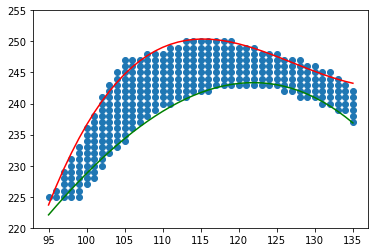

In [63]:
xs, layers = function_normals.build_cwbz_layers(cwbzr)
layer_index = 15
layer = layers[layer_index]
x = np.array([x[0] for x in layer])
y = np.array([x[1] for x in layer])
df = pd.DataFrame(layer, columns=['x', 'y'])
upper_points = df.groupby(by='x').max().reset_index()
lower_points = df.groupby(by='x').min().reset_index()
try:
    upper_fit = poly.polyfit(upper_points['x'], upper_points['y'], 3)
    lower_fit = poly.polyfit(lower_points['x'], lower_points['y'], 3)
except np.linalg.LinAlgError as e:
    print(e)
    
upper_fun = poly.polyval(upper_points['x'], upper_fit)
lower_fun = poly.polyval(lower_points['x'], lower_fit)
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [64]:
der = poly.polyder(lower_fit)
# new_x = np.arange(min(lower_points['x']), max(lower_points['x']), step=.01)
new_x = lower_points['x'].to_numpy()

In [65]:
normals = [poly.polyval(val, lower_fit) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]

In [66]:
normal_fits = [poly.polyfit(new_x, normal, 1) for normal in normals]

In [67]:
len(new_x), len(normal_fits)

(41, 41)

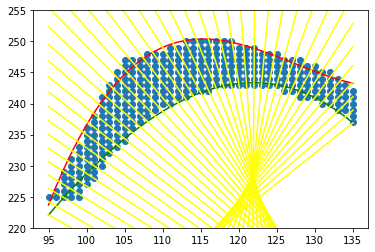

In [68]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')
for i in range(len(normals)):
    ax.plot(new_x, normals[i], c='yellow')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [69]:
n_fit = poly.polyfit(new_x, normals[10], 1)
n_fun = poly.polyval(new_x, n_fit)

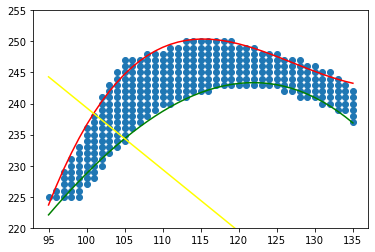

In [70]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')
ax.plot(new_x, n_fun, c='yellow')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [71]:
from scipy.optimize import fsolve

In [72]:
fsolve(lambda x: poly.polyval(x, upper_fit) - poly.polyval(x, n_fit), 0)

array([100.92572196])

In [73]:
poly.polyval(95, upper_fit), poly.polyval(95, n_fit)

(223.67734307665887, 244.30433197132254)

In [74]:
fsolve(lambda x: poly.polyval(x, lower_fit) - poly.polyval(x, n_fit), 0)[0]

104.99999999999994

In [75]:
new_x[10]

105

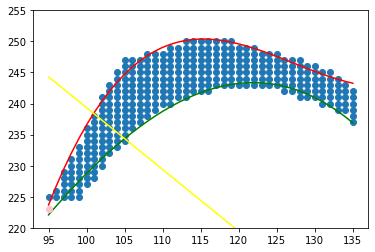

In [76]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')
ax.plot(new_x, n_fun, c='yellow')
ax.plot(95, 223, marker='o', c='pink')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [77]:
round(110.68488173)

111

In [78]:
lower_intersections = []
upper_intersections = []

for i, val in enumerate(new_x):
    upper_intersection_x = fsolve(lambda l: poly.polyval(l, upper_fit) - poly.polyval(l, normal_fits[i]), 0)[0]
    # upper_intersection_x = round(fsolve(lambda l: poly.polyval(l, normal_fits[i]) - poly.polyval(l, upper_fit), 0)[0])
    upper_intersection_y = poly.polyval(upper_intersection_x, upper_fit)

    lower_intersection_x = new_x[i]
    lower_intersection_y = poly.polyval(lower_intersection_x, lower_fit)

    # print(upper_intersection_x, upper_intersection_y)
    # print(lower_intersection_x, lower_intersection_y)
    lower_intersections.append((lower_intersection_x, lower_intersection_y))
    upper_intersections.append((upper_intersection_x, upper_intersection_y))

In [79]:
upper_intersections

[(94.58573009585605, 222.37049602743446),
 (95.13962290329331, 224.10912180948026),
 (95.70697424397059, 225.81917551817833),
 (96.2889672545183, 227.50021580664907),
 (96.88698336877461, 229.15180295012988),
 (97.50264162335814, 230.77347577359888),
 (98.13784619553533, 232.36471668525928),
 (98.7948436795228, 233.92489974752334),
 (99.47629160349344, 235.45321465811367),
 (100.18533938099026, 236.94855670082916),
 (100.92572196035603, 238.40936899598182),
 (101.70186430567448, 239.83341869783635),
 (102.51899048701391, 241.21748351788574),
 (103.38322281987612, 242.55692048096125),
 (104.30164135038675, 243.84508883602757),
 (105.28224796756338, 245.07261191914904),
 (106.33373808240877, 246.22650534189688),
 (107.46492543759675, 247.28930014871548),
 (108.68360739137339, 248.23848680632364),
 (109.99465559581702, 249.0469111509483),
 (111.39729858507614, 249.68505390814607),
 (112.88209769868868, 250.12602684061721),
 (114.42898077753992, 250.35298259666934),
 (116.00824039474705, 2

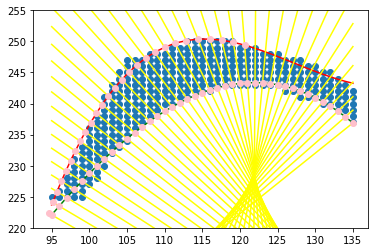

In [80]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')

for normal_fit in normal_fits:
    ax.plot(new_x, poly.polyval(new_x, normal_fit), c='yellow')

for marker in lower_intersections:
    ax.plot(marker[0], marker[1], marker='o', c='pink')
    
for marker in upper_intersections[:27]:
    ax.plot(marker[0], marker[1], marker='o', c='pink')
    
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [81]:
lower_intersections = []
upper_intersections = []

for i, val in enumerate(new_x):
    der = poly.polyder(lower_fit)
    normal = poly.polyval(val, lower_fit) - (1 / poly.polyval(val, der)) * (new_x - val)
    normal_fit = poly.polyfit(new_x, normal, 1)
    upper = False
    
    if normal_fit[1] >= 0:
        der = poly.polyder(upper_fit)
        normal = poly.polyval(val, upper_fit) - (1 / poly.polyval(val, der)) * (new_x - val)
        normal_fit = poly.polyfit(new_x, normal, 1)
        upper = True
    
    if upper:
        upper_intersection_x = new_x[i]
        upper_intersection_y = poly.polyval(upper_intersection_x, upper_fit)

        lower_intersection_x = fsolve(lambda l: poly.polyval(l, lower_fit) - poly.polyval(l, normal_fit), 0)[0]
        lower_intersection_y = poly.polyval(lower_intersection_x, lower_fit)
    else:
        upper_intersection_x = fsolve(lambda l: poly.polyval(l, upper_fit) - poly.polyval(l, normal_fit), 0)[0]
        upper_intersection_y = poly.polyval(upper_intersection_x, upper_fit)

        lower_intersection_x = new_x[i]
        lower_intersection_y = poly.polyval(lower_intersection_x, lower_fit)

    lower_intersections.append((lower_intersection_x, lower_intersection_y))
    upper_intersections.append((upper_intersection_x, upper_intersection_y))

In [82]:
lower_intersections

[(95, 222.08054452637518),
 (96, 223.49108662182954),
 (97, 224.86435459038978),
 (98, 226.19907851350985),
 (99, 227.4939884726436),
 (100, 228.74781454924488),
 (101, 229.9592868247678),
 (102, 231.12713538066603),
 (103, 232.25009029839367),
 (104, 233.32688165940453),
 (105, 234.35623954515253),
 (106, 235.33689403709167),
 (107, 236.26757521667568),
 (108, 237.14701316535863),
 (109, 237.97393796459437),
 (110, 238.74707969583673),
 (111, 239.46516844053977),
 (112, 240.1269342801573),
 (113, 240.73110729614325),
 (114, 241.27641756995155),
 (115, 241.76159518303606),
 (116, 242.18537021685077),
 (117, 242.54647275284947),
 (118, 242.84363287248615),
 (119, 243.07558065721474),
 (120, 243.2410461884891),
 (121, 243.33875954776317),
 (119.75261337772822, 243.2063703431654),
 (120.79529215960751, 243.3243338314393),
 (121.88376253183293, 243.36770196611783),
 (122.99627460752897, 243.3261370682764),
 (124.1149583890046, 243.19503485188415),
 (125.2265616342798, 242.97430302719096),


In [83]:
upper_intersections

[(94.58573009585605, 222.37049602743446),
 (95.13962290329331, 224.10912180948026),
 (95.70697424397059, 225.81917551817833),
 (96.2889672545183, 227.50021580664907),
 (96.88698336877461, 229.15180295012988),
 (97.50264162335814, 230.77347577359888),
 (98.13784619553533, 232.36471668525928),
 (98.7948436795228, 233.92489974752334),
 (99.47629160349344, 235.45321465811367),
 (100.18533938099026, 236.94855670082916),
 (100.92572196035603, 238.40936899598182),
 (101.70186430567448, 239.83341869783635),
 (102.51899048701391, 241.21748351788574),
 (103.38322281987612, 242.55692048096125),
 (104.30164135038675, 243.84508883602757),
 (105.28224796756338, 245.07261191914904),
 (106.33373808240877, 246.22650534189688),
 (107.46492543759675, 247.28930014871548),
 (108.68360739137339, 248.23848680632364),
 (109.99465559581702, 249.0469111509483),
 (111.39729858507614, 249.68505390814607),
 (112.88209769868868, 250.12602684061721),
 (114.42898077753992, 250.35298259666934),
 (116.00824039474705, 2

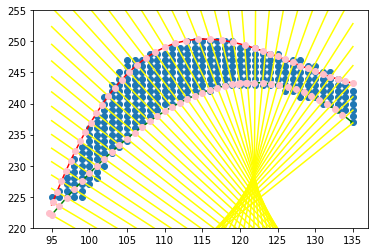

In [84]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')

for normal_fit in normal_fits:
    ax.plot(new_x, poly.polyval(new_x, normal_fit), c='yellow')

for marker in lower_intersections:
    ax.plot(marker[0], marker[1], marker='o', c='pink')
    
for marker in upper_intersections:
    ax.plot(marker[0], marker[1], marker='o', c='pink')
    
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [85]:
import analytical_normals as an
import function_normals

In [103]:
importlib.reload(an)

<module 'analytical_normals' from 'E:\\Data\\knorpel_v2\\analytical_normals.py'>

In [104]:
an.function_for_pool(9102858)

1
2
3
4
5
6


c:\programdata\anaconda3\envs\knorpel_v2\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


7
8


{'dir': 9102858,
 'ecLF': 2.5904486143736816,
 'ccLF': 2.966115407995979,
 'icLF': 1.765096065893828,
 'ecMF': 1.4302442004534242,
 'ccMF': 2.7749186089921922,
 'icMF': 1.672475780896574,
 'pLF': 2.5339699112519494,
 'pMF': 2.470103861147655,
 'aLF': 2.4633368804782885,
 'aMF': 2.924274636803001,
 'eLT': 1.4742658757780498,
 'pLT': 1.6084661214771516,
 'iLT': 1.4923964787273474,
 'aLT': 2.0889791455436124,
 'cLT': 2.3373586558788166,
 'eMT': 1.356850637489187,
 'pMT': 2.0735314046801165,
 'iMT': 0.9022135268407936,
 'aMT': 0.5946040407915327,
 'cMT': 1.260794298742728,
 'iMT.aSD': 0.4477246446216268,
 'iMT.aMav': 1.9660764129149477,
 'iMT.aMiv': 0.3353829383815564,
 'iLT.aSD': 0.4993366337543078,
 'iLT.aMav': 2.4550368735067734,
 'iLT.aMiv': 0.6526150367644536,
 'cLT.aSD': 0.5785539419585023,
 'cLT.aMav': 3.151201822628281,
 'cLT.aMiv': 1.0402177559775216,
 'eMT.aSD': 0.2809254949154559,
 'eMT.aMav': 1.8088714990103036,
 'eMT.aMiv': 0.7257494970597933,
 'pMT.aSD': 0.28894770930104774,


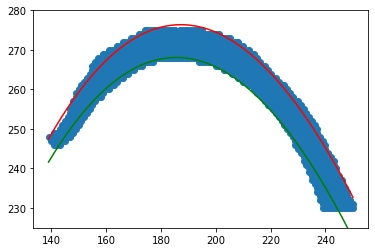

In [86]:
xs, layers = function_normals.build_peripheral_layers(lpdf)
layer_index = 15
layer = layers[layer_index]
x = np.array([x[0] for x in layer])
y = np.array([x[1] for x in layer])
df = pd.DataFrame(layer, columns=['x', 'y'])
upper_points = df.groupby(by='x').max().reset_index()
lower_points = df.groupby(by='x').min().reset_index()
try:
    upper_fit = poly.polyfit(upper_points['x'], upper_points['y'], 3)
    lower_fit = poly.polyfit(lower_points['x'], lower_points['y'], 3)
except np.linalg.LinAlgError as e:
    print(e)
    
upper_fun = poly.polyval(upper_points['x'], upper_fit)
lower_fun = poly.polyval(lower_points['x'], lower_fit)
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [87]:
der = poly.polyder(lower_fit)
# new_x = np.arange(min(lower_points['x']), max(lower_points['x']), step=.01)
new_x = lower_points['x'].to_numpy()

In [88]:
normals = [poly.polyval(val, lower_fit) - (1 / poly.polyval(val, der)) * (new_x - val) for val in new_x]

In [89]:
normal_fits = [poly.polyfit(new_x, normal, 1) for normal in normals]

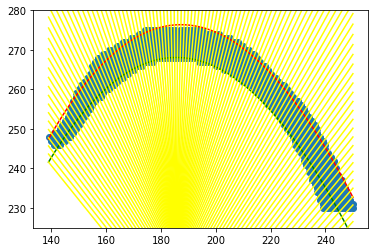

In [90]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')
for i in range(len(normals)):
    ax.plot(new_x, normals[i], c='yellow')
plt.ylim((min(y) - 5, max(y) + 5))
plt.show()

In [47]:
lower_intersections = []
upper_intersections = []

for i, val in tqdm(enumerate(new_x)):
    der = poly.polyder(lower_fit)
    normal = poly.polyval(val, lower_fit) - (1 / poly.polyval(val, der)) * (new_x - val)
    normal_fit = poly.polyfit(new_x, normal, 1)
    upper = False
    
    if normal_fit[1] >= 0:
        der = poly.polyder(upper_fit)
        normal = poly.polyval(val, upper_fit) - (1 / poly.polyval(val, der)) * (new_x - val)
        normal_fit = poly.polyfit(new_x, normal, 1)
        upper = True
    
    if upper:
        upper_intersection_x = new_x[i]
        upper_intersection_y = poly.polyval(upper_intersection_x, upper_fit)

        lower_intersection_x = fsolve(lambda l: poly.polyval(l, lower_fit) - poly.polyval(l, normal_fit), 0)[0]
        lower_intersection_y = poly.polyval(lower_intersection_x, lower_fit)
    else:
        upper_intersection_x = fsolve(lambda l: poly.polyval(l, upper_fit) - poly.polyval(l, normal_fit), 0)[0]
        upper_intersection_y = poly.polyval(upper_intersection_x, upper_fit)

        lower_intersection_x = new_x[i]
        lower_intersection_y = poly.polyval(lower_intersection_x, lower_fit)

    lower_intersections.append((lower_intersection_x, lower_intersection_y))
    upper_intersections.append((upper_intersection_x, upper_intersection_y))

112it [00:00, 1166.66it/s]


In [100]:
lower_intersections = []
upper_intersections = []

for i, val in tqdm(enumerate(new_x)):
    der = poly.polyder(lower_fit)
    normal = poly.polyval(val, lower_fit) - (1 / poly.polyval(val, der)) * (new_x - val)
    idx = np.argwhere(np.diff(np.sign(normal - poly.polyval(new_x, upper_fit)))).flatten()
    lower_intersection_x = new_x[i]
    lower_intersection_y = poly.polyval(lower_intersection_x, lower_fit)
    upper_intersection_x = new_x[idx]
    if len(upper_intersection_x) == 0:
        continue
    upper_intersection_x = upper_intersection_x[0]
    upper_intersection_y = poly.polyval(upper_intersection_x, upper_fit)
    lower_intersections.append((lower_intersection_x, lower_intersection_y))
    upper_intersections.append((upper_intersection_x, upper_intersection_y))

112it [00:00, 13998.09it/s]


In [92]:
new_x

array([139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250], dtype=int64)

In [96]:
lower_intersections = []
upper_intersections = []

for i, val in enumerate(new_x):
    upper_intersection_x = fsolve(lambda l: poly.polyval(l, upper_fit) - poly.polyval(l, normal_fits[i]), 0)[0]
    # upper_intersection_x = round(fsolve(lambda l: poly.polyval(l, normal_fits[i]) - poly.polyval(l, upper_fit), 0)[0])
    upper_intersection_y = poly.polyval(upper_intersection_x, upper_fit)

    lower_intersection_x = new_x[i]
    lower_intersection_y = poly.polyval(lower_intersection_x, lower_fit)

    # print(upper_intersection_x, upper_intersection_y)
    # print(lower_intersection_x, lower_intersection_y)
    lower_intersections.append((lower_intersection_x, lower_intersection_y))
    upper_intersections.append((upper_intersection_x, upper_intersection_y))

IndexError: invalid index to scalar variable.

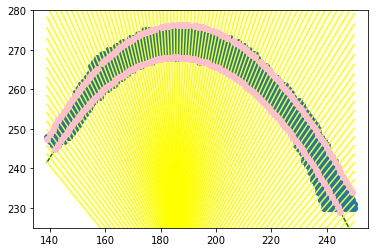

In [101]:
plt.scatter(x, y)
ax = plt.gca()
ax.plot(upper_points['x'], upper_fun, c='r')
ax.plot(lower_points['x'], lower_fun, c='g')

for normal_fit in normal_fits:
    ax.plot(new_x, poly.polyval(new_x, normal_fit), c='yellow')

for marker in lower_intersections:
    ax.plot(marker[0], marker[1], marker='o', c='pink')
    
for marker in upper_intersections:
    ax.plot(marker[0], marker[1], marker='o', c='pink')
    
plt.ylim((min(y) - 5, max(y) + 5))
plt.xlim(min(new_x) - 5, max(new_x) + 5)
plt.show()

In [102]:
upper_intersections

[(139, 247.46094868760858),
 (140, 248.67271784147098),
 (141, 249.85746568136452),
 (142, 251.01526300543938),
 (143, 252.14618061184572),
 (143, 252.14618061184572),
 (144, 253.25028929873346),
 (145, 254.32765986425275),
 (146, 255.3783631065535),
 (147, 256.40246982378585),
 (148, 257.40005081410004),
 (149, 258.3711768756458),
 (150, 259.31591880657345),
 (151, 260.23434740503285),
 (152, 261.1265334691741),
 (153, 261.9925477971474),
 (154, 262.8324611871027),
 (155, 263.64634443719),
 (156, 264.4342683455594),
 (157, 265.196303710361),
 (159, 266.642992001861),
 (160, 267.32778652485956),
 (161, 267.98697569689034),
 (162, 268.62063031610364),
 (163, 269.22882118064956),
 (164, 269.81161908867796),
 (165, 270.36909483833904),
 (166, 270.90131922778266),
 (167, 271.40836305515916),
 (168, 271.8902971186184),
 (169, 272.3471922163104),
 (170, 272.7791191463855),
 (172, 273.56835169628425),
 (173, 273.92579891240837),
 (174, 274.2585611535154),
 (175, 274.56670921775583),
 (176, 27

In [95]:
lower_intersections

[(139, 241.6210558138307),
 (140, 242.7665076856096),
 (141, 243.8856901067706),
 (142, 244.97866597498245),
 (143, 246.04549818791372),
 (144, 247.0862496432332),
 (145, 248.10098323860967),
 (146, 249.08976187171163),
 (147, 250.05264844020797),
 (148, 250.98970584176732),
 (149, 251.90099697405827),
 (150, 252.78658473474974),
 (151, 253.64653202151027),
 (152, 254.48090173200853),
 (153, 255.28975676391326),
 (154, 256.07316001489323),
 (155, 256.8311743826171),
 (156, 257.5638627647536),
 (157, 258.2712880589712),
 (158, 258.9535131629389),
 (159, 259.61060097432534),
 (160, 260.242614390799),
 (161, 260.8496163100288),
 (162, 261.4316696296834),
 (163, 261.9888372474314),
 (164, 262.5211820609416),
 (165, 263.02876696788275),
 (166, 263.5116548659234),
 (167, 263.9699086527322),
 (168, 264.40359122597806),
 (169, 264.8127654833296),
 (170, 265.19749432245544),
 (171, 265.5578406410243),
 (172, 265.89386733670494),
 (173, 266.20563730716606),
 (174, 266.49321345007627),
 (175, 266

In [105]:
pd.read_pickle('out/an')

,ecLF,ccLF,icLF,ecMF,ccMF,icMF,pLF,pMF,aLF,aMF,...,aMT.aMiv,pLT.aSD,pLT.aMav,pLT.aMiv,pMT.aSD,pMT.aMav,pMT.aMiv,aLF.aSD,aLF.aMav,aLF.aMiv
dir,,,,,,,,,,,,,,,,,,,,,
9001104,0.849132,1.012729,1.290364,1.215494,1.651424,1.119983,1.902120,1.781891,1.799962,1.726492,...,0.288008,0.311787,1.420311,0.315863,0.364801,2.167240,0.667644,0.548845,3.136618,0.631727
9002430,1.976024,2.208005,2.089517,2.267265,2.971076,2.300497,2.480615,3.080499,2.344548,2.756897,...,0.453330,0.391629,1.920539,0.357050,0.452142,2.862882,0.788389,0.508311,3.106159,0.552948
9002817,0.574371,1.412331,1.722635,1.725421,2.730435,1.612897,2.254395,2.641915,2.367274,2.826478,...,0.187104,0.393666,2.143191,0.527596,0.698741,4.004907,0.973231,0.893515,4.818693,0.402660
9003430,1.653609,2.549335,1.858666,1.935072,2.025663,1.350463,2.592361,2.678796,2.659130,2.332133,...,0.652670,0.423210,2.513748,0.744310,0.695683,3.737663,0.912675,0.903522,4.172797,0.791991
9004175,1.494202,2.785562,2.360879,1.772088,2.255788,1.430771,2.765166,2.308985,2.882192,2.512759,...,0.510821,0.452832,2.049718,0.411078,0.667425,3.572851,1.055419,0.669155,4.073528,0.713439
9005075,1.451118,2.360906,1.651437,1.821269,2.674145,1.976301,2.575028,2.280113,2.420769,2.544215,...,0.485087,0.466834,2.096052,0.390559,0.762014,3.398254,0.628546,0.602055,3.612508,0.743178
9005132,1.417883,2.121299,1.718559,1.698238,2.063043,1.573556,1.879627,2.157887,2.331033,2.351788,...,0.350339,0.421416,1.800826,0.116756,0.608140,2.627281,0.406017,0.726271,4.076497,0.304844
9006723,1.581496,2.793865,2.082356,1.433134,2.530080,1.828641,2.549884,2.471725,2.649582,2.579828,...,0.319696,0.334046,1.612727,0.342966,0.554827,2.945126,0.813993,0.949574,4.968704,0.681698
9007827,0.804628,0.870052,0.971860,1.305399,1.662833,1.229788,2.392760,2.423148,1.667719,1.878192,...,0.263093,0.151803,0.923306,0.228491,0.469750,2.558767,0.813758,0.688925,3.114227,0.038441


In [5]:
cwbzl, cwbzr = utility.extract_central_weightbearing_zone(
        femoral_vectors, tibial_vectors)
lpdf, rpdf, adf = utility.extract_anterior_posterior_zones(
    femoral_vectors, cwbzl, cwbzr)

lower_mesh_left, upper_mesh_left = utility.build_femoral_meshes(cwbzl)
lower_mesh_right, upper_mesh_right = utility.build_femoral_meshes(cwbzr)


In [6]:
from scipy.spatial import KDTree

tree = KDTree(lower_mesh_left.points)
d_kdtree, idx = tree.query(upper_mesh_left.points)
np.mean(d_kdtree)

6.327161679589848

In [9]:
mod = lambda x: x * 0.35
mod(d_kdtree)

array([1.44308697, 1.75      , 2.1       , 2.1       , 2.1       ,
       2.45      , 2.45      , 2.45      , 2.45      , 2.1       ,
       2.1       , 2.1       , 2.12896689, 2.21359436, 2.34787138,
       2.1       , 2.12896689, 2.21359436, 2.04083316, 2.1       ,
       2.12896689, 2.21359436, 2.04083316, 2.12896689, 1.88480768,
       2.04083316, 2.21359436, 2.04083316, 1.88480768, 1.75      ,
       1.75      , 1.75      , 1.75      , 1.56524758, 1.26194295,
       1.26194295, 1.44308697, 1.75      , 2.1       , 2.1       ,
       2.1       , 2.1       , 2.1       , 2.1       , 2.1       ,
       2.1       , 2.1       , 2.1       , 2.12896689, 2.21359436,
       2.04083316, 2.1       , 2.12896689, 2.21359436, 2.04083316,
       2.12896689, 2.1575449 , 1.91702895, 2.07062792, 2.1575449 ,
       1.91702895, 2.07062792, 1.88480768, 2.04083316, 1.91702895,
       1.78465683, 1.75      , 1.75      , 1.52561463, 1.48492424,
       1.30958009, 1.05      , 1.48492424, 1.78465683, 2.12896

In [21]:
d = list()
l = list()
u = list()
for p in tqdm(lower_mesh_left.points):
    dist = 1000000000000
    for n in upper_mesh_left.points:
        if (x := utility.vector_distance(p, n)) < dist:
            dist = x
    
    d.append(dist)

np.mean(np.array(d))

100%|████████████████████████████████████████████████████████████████████████████████| 991/991 [00:10<00:00, 95.61it/s]


5.573158401220859

In [24]:
left_landmarks = utility.femoral_landmarks(upper_mesh_left.points)
right_landmarks = utility.femoral_landmarks(upper_mesh_right.points)

left_thickness = dict()
left_thickness['ecLF'] = np.zeros(lower_mesh_left.n_points)
left_thickness['ccLF'] = np.zeros(lower_mesh_left.n_points)
left_thickness['icLF'] = np.zeros(lower_mesh_left.n_points)

tree = KDTree(lower_mesh_left.points)
distances, _ = tree.query(x=upper_mesh_left.points, k=1, workers=-1)

for i, distance in enumerate(distances):
    key = utility.classify_femoral_point(lower_mesh_left.points[i][:2], left_landmarks, left=True)
    if key not in ('ecLF', 'ccLF', 'icLF'):
        logging.warning(f'Got wrong key {key} for lateral femur.')
        continue

    left_thickness[key][i] = distance

In [28]:
tmp = np.hstack(([left_thickness[key] for key in left_thickness.keys()]))
mask = tmp == 0
tmp[mask] = np.nan
np.nanmean(tmp)

6.411265055698915

In [13]:
lower_mesh_leftn = lower_mesh_left.compute_normals(point_normals=True, cell_normals=False, auto_orient_normals=True)
lower_mesh_leftn["distances"] = np.empty(lower_mesh_left.n_points)
for i in range(lower_mesh_leftn.n_points):
    p = lower_mesh_leftn.points[i]
    vec = lower_mesh_leftn["Normals"][i] * lower_mesh_leftn.length
    p0 = p - vec
    p1 = p + vec
    ip, ic = upper_mesh_left.ray_trace(p0, p1, first_point=True)
    dist = np.sqrt(np.sum((ip - p) ** 2))
    lower_mesh_leftn["distances"][i] = dist

# Replace zeros with nans
mask = lower_mesh_leftn["distances"] == 0
lower_mesh_leftn["distances"][mask] = np.nan
np.nanmean(lower_mesh_leftn["distances"])

6.461736164927659

In [16]:
x = np.array([2,3,-1])
y = np.array([4,1,-2])
print(utility.vector_distance(x, y))
print(np.sqrt(np.sum((x - y) ** 2)))

3.0
3.0
